<a href="https://colab.research.google.com/github/MinsooKwak/Project1/blob/main/AI_07_%EA%B3%BD%EB%AF%BC%EC%88%98_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 목표: 다음 분기에 어떤 게임을 설계해야 할까 (게임 회사의 데이터 팀)

*   다음 분기에 어떤 게임을 설계해야 할까
*   의사결정

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

데이터셋을 읽는 것 ~ 이러한 게임을 만들어야 한다는 결론까지 의 과정 + 설명하는 영상(5분)
시간 초과X

## Project01. Game project

### Project 준비과정

#### Data 불러오기

In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df=df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#### 먼저 데이터 파악

In [ ]:
df.info() 
#16598 개의 데이터 --> 결측치 처리 후 16241 data 
    #Year, Genre, Publisher 데이터 부족 --> 결측치 있는 행을 확인해보려 했으나, 집단이 상이해지므로 삭제했음 (완료)
# 수치형 데이터가 Year밖에 없음. # Sales는 숫자형으로 바꿔줘야 --> (완료)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


#### 전처리(Sales)

In [ ]:
#결측치 전처리

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df = df.dropna()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#Sales 수치형으로 전환(출고량이기 때문에 숫자형으로 변환시켜준다.)

In [ ]:
def replaceother(string):
  try:
    tmp=float(string)
  except:
    tmp=0
  return tmp
#  return (string.replace('0.',''))

In [ ]:
df['NA_Sales']=df['NA_Sales'].apply(replaceother)
df['EU_Sales']=df['EU_Sales'].apply(replaceother)
df['JP_Sales']=df['JP_Sales'].apply(replaceother)
df['Other_Sales']=df['Other_Sales'].apply(replaceother)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [ ]:
df['Year']=df['Year'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
year_column = df['Year']
year_column = pd.DataFrame(year_column)
year_column.value_counts()

Year  
2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
97.0         2
1.0          2
86.0         1
94.0         1
2020.0       1
Length: 62, dtype: int64

In [ ]:
df['NA_Sales']=df['NA_Sales']*100
df['EU_Sales']=df['EU_Sales']*100
df['JP_Sales']=df['JP_Sales']*100
df['Other_Sales']=df['Other_Sales']*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

####시계열 전처리

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [ ]:
df['Year']=df['Year'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def replaceother2(str):
  return (str.replace('.0',''))

In [ ]:
df['Year']=df['Year'].apply(replaceother2)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [ ]:
def lenth_del_underf(x):
  if len(x)<4:
    del x
  elif len(x)==4:
    return x

In [ ]:
df['Year']=df['Year'].apply(lenth_del_underf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#df['Year']=pd.to_datetime(df.Year)

In [ ]:
#df['Year']=df['Year'].dt.year

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           100
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.dropna

<bound method DataFrame.dropna of                                                  Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...         0.0
1                                      The Munchables  ...         1.0
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...         0.0
3                    Deal or No Deal: Special Edition  ...         0.0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...         4.0
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...         1.0
16594                     Rainbow Islands: Revolution  ...         0.0
16595                                        NBA 2K16  ...        13.0
16596                     Toukiden: The Age of Demons  ...         3.0
16597                        The King of Fighters '95  ...         1.0

[16241 rows x 9 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16141 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


#### Standscaler, PCA 진행

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

In [ ]:
name_index = df['Name']
platform_index =df['Platform']
genre_index = df['Genre']
publisher_index = df['Publisher']
year_index = df['Year']

In [ ]:
year_index.unique() #안에 어떠한 값들이 있는지 확인해줌

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', None, '1995',
       '1993', '2012', '1987', '1982', '1994', '1990', '1992', '1991',
       '1983', '1988', '1981', '1989', '1986', '2017', '1980', '2020'],
      dtype=object)

In [ ]:
platform_index.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
publisher_index.unique() # 너무 많으므로, 추려야 할 것 같음 (순위별이라던가)

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [ ]:
#scale하기 위해 scale에 불필요한 칼럼들을 따로 저장해 제거해주었음

In [ ]:
df_for_scale = df.iloc[:,5:]
df_for_scale.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,4.0,0.0,0.0,0.0
1,17.0,0.0,0.0,1.0
2,0.0,0.0,2.0,0.0
3,4.0,0.0,0.0,0.0
4,12.0,9.0,0.0,4.0


In [ ]:
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df_for_scale)

In [ ]:
print("Scaled data: \n",Scaled_df)

Scaled data: 
 [[-0.27078885 -0.28699469 -0.25159686 -0.25210528]
 [-0.11121449 -0.28699469 -0.25159686 -0.19933778]
 [-0.31988865 -0.28699469 -0.18629261 -0.25210528]
 ...
 [ 0.22020919  0.0883827  -0.15364049  0.4338723 ]
 [-0.2585139  -0.18821117  0.56470621 -0.09380276]
 [-0.31988865 -0.28699469  0.2708371  -0.19933778]]


In [ ]:
# 주성분 분석(PCA)를 해줄건데, 왜 PCA를 해주는지 생각해보면 좋을 것
'''여기에선 어떤 의미가 있는지'''
# PCA가 데이터를 투영해 fit이 좋은지 안좋은지 PCA가 결정을 하는데, 선에서 데이터까지의 거리를 측정하고 거리를 최소화하는 선을 찾는다.
# 분산은 최대화 (데이터를 보존) :거리제곱합(SSdistance, sum of square distance)을 최대화 시켜주며, 이것이 고유벡터 

'여기에선 어떤 의미가 있는지'

In [ ]:
pca = PCA(2)
pca.fit(Scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ 
#pca explained_variance를 통해 PC 설명 정도를 파악해보니 첫번째 PC가 가장 설명력이 높고, PC2까지가 양호하고, PC3는 낮아 pca 수 줄임.

array([2.67484919, 0.76079356])

In [ ]:
'''
PC1이 66% 정도의 설명력을, PC2가19% 정도의 설명력을 PC3는 8%정도의 설명력을 갖고 있다. 
85% 이상의 정보를 설명하기 위해 2개의 PC를 사용할 수 있다.
'''
ratio= pca.explained_variance_ratio_ 
ratio

array([0.66867112, 0.19018668])

In [ ]:
principlalComponents = pca.fit_transform(Scaled_df)
principalDf= pd.DataFrame(data=principlalComponents,
                          columns = ['PC1','PC2'])

In [ ]:
finalDf=pd.concat([name_index, platform_index, year_index,genre_index,publisher_index,principalDf],axis=1)
finalDf

,Name,Platform,Year,Genre,Publisher,PC1,PC2
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,-0.528175,-0.058056
1,The Munchables,Wii,2009,Action,Namco Bandai Games,-0.415036,-0.089221
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,-0.530460,0.003314
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,-0.528175,-0.058056
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,-0.268720,-0.179932
...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,NaN,NaN
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,NaN,NaN
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,NaN,NaN
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,NaN,NaN


In [ ]:
finalDf = finalDf.dropna() #결측치 제거해줌
finalDf

,Name,Platform,Year,Genre,Publisher,PC1,PC2
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,-0.528175,-0.058056
1,The Munchables,Wii,2009,Action,Namco Bandai Games,-0.415036,-0.089221
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,-0.530460,0.003314
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,-0.528175,-0.058056
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,-0.268720,-0.179932
...,...,...,...,...,...,...,...
16235,Mercenaries 2: World in Flames,X360,2008,Shooter,Electronic Arts,-0.530460,0.003314
16236,One Piece: Gigant Battle!,DS,2010,Fighting,Namco Bandai Games,-0.384233,-0.100847
16237,KimiKiss,PS2,2006,Adventure,Enterbrain,-0.548105,-0.055858
16238,Driver: San Francisco,PC,2011,Racing,Ubisoft,0.331514,-0.343206


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
name_finalDf=pd.concat([principalDf,name_index],axis=1)
name_finalDf = name_finalDf.dropna() #결측치 제거
name_finalDf

,PC1,PC2,Name
0,-0.528175,-0.058056,Candace Kane's Candy Factory
1,-0.415036,-0.089221,The Munchables
2,-0.530460,0.003314,Otome wa Oanesama Boku ni Koi Shiteru Portable
3,-0.528175,-0.058056,Deal or No Deal: Special Edition
4,-0.268720,-0.179932,Ben 10 Ultimate Alien: Cosmic Destruction
...,...,...,...
16235,-0.530460,0.003314,Mercenaries 2: World in Flames
16236,-0.384233,-0.100847,One Piece: Gigant Battle!
16237,-0.548105,-0.055858,KimiKiss
16238,0.331514,-0.343206,Driver: San Francisco


In [ ]:
platform_finalDf=pd.concat([principalDf,platform_index],axis=1)
platform_finalDf = platform_finalDf.dropna() #결측치 제거해줌
platform_finalDf

,PC1,PC2,Platform
0,-0.528175,-0.058056,DS
1,-0.415036,-0.089221,Wii
2,-0.530460,0.003314,PSP
3,-0.528175,-0.058056,DS
4,-0.268720,-0.179932,PS3
...,...,...,...
16235,-0.530460,0.003314,X360
16236,-0.384233,-0.100847,DS
16237,-0.548105,-0.055858,PS2
16238,0.331514,-0.343206,PC


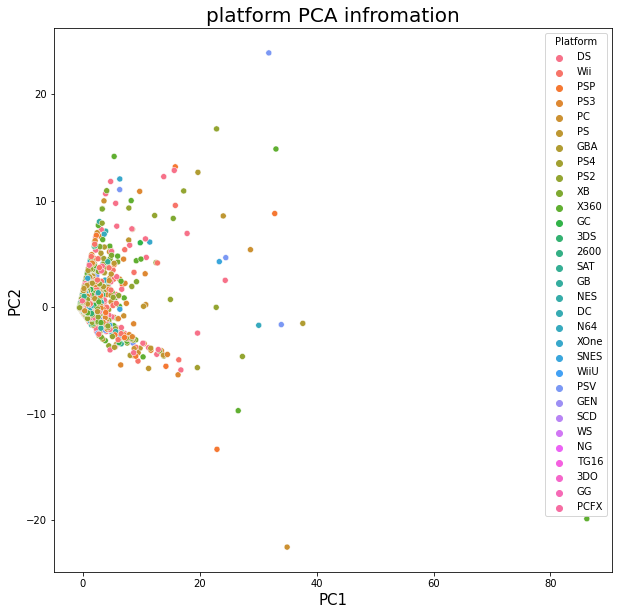

In [ ]:
#scatter plot 그리기 
'''PCA를 통한 데이터 분포는 비슷한 것으로 보인다. '''
fig20 = plt.figure(figsize=(10,10))
ax=fig20.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('platform PCA infromation',fontsize=20)

sns.scatterplot(data=platform_finalDf,x='PC1',y='PC2',hue='Platform')

In [ ]:
genre_finalDf=pd.concat([principalDf,genre_index],axis=1)
genre_finalDf = genre_finalDf.dropna() #결측치 제거해줌
genre_finalDf

,PC1,PC2,Genre
0,-0.528175,-0.058056,Action
1,-0.415036,-0.089221,Action
2,-0.530460,0.003314,Adventure
3,-0.528175,-0.058056,Misc
4,-0.268720,-0.179932,Platform
...,...,...,...
16235,-0.530460,0.003314,Shooter
16236,-0.384233,-0.100847,Fighting
16237,-0.548105,-0.055858,Adventure
16238,0.331514,-0.343206,Racing


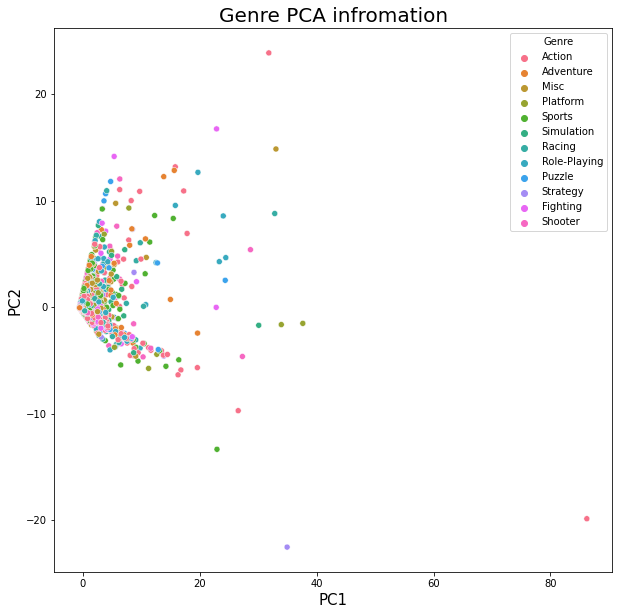

In [ ]:
#scatter plot 그리기 
'''PCA를 통한 데이터 분포는 비슷한 것으로 보인다. '''
fig21 = plt.figure(figsize=(10,10))
ax=fig21.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('Genre PCA infromation',fontsize=20)

sns.scatterplot(data=genre_finalDf,x='PC1',y='PC2',hue='Genre')

In [ ]:
publisher_finalDf=pd.concat([principalDf,publisher_index],axis=1)
publisher_finalDf = publisher_finalDf.dropna() #결측치 제거해줌
publisher_finalDf

,PC1,PC2,Publisher
0,-0.528175,-0.058056,Destineer
1,-0.415036,-0.089221,Namco Bandai Games
2,-0.530460,0.003314,Alchemist
3,-0.528175,-0.058056,Zoo Games
4,-0.268720,-0.179932,D3Publisher
...,...,...,...
16235,-0.530460,0.003314,Electronic Arts
16236,-0.384233,-0.100847,Namco Bandai Games
16237,-0.548105,-0.055858,Enterbrain
16238,0.331514,-0.343206,Ubisoft


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


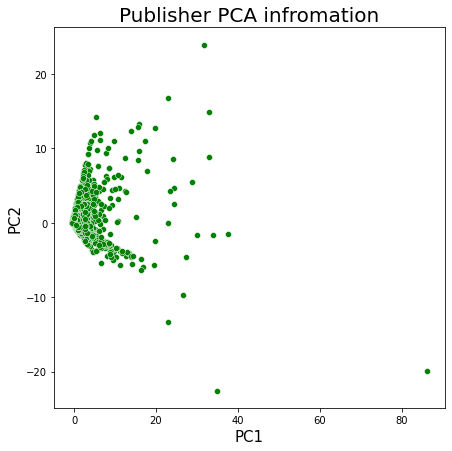

In [ ]:
#scatter plot 그리기 
'''PCA를 통한 데이터 분포는 비슷한 것으로 보인다. '''
fig20 = plt.figure(figsize=(7,7))
ax=fig20.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('Publisher PCA infromation',fontsize=20)

sns.scatterplot(data=publisher_finalDf,x='PC1',y='PC2',color='G')

In [ ]:
year_finalDf=pd.concat([principalDf,year_index],axis=1)
year_finalDf = year_finalDf.dropna() #결측치 제거해줌
year_finalDf

,PC1,PC2,Year
0,-0.528175,-0.058056,2008
1,-0.415036,-0.089221,2009
2,-0.530460,0.003314,2010
3,-0.528175,-0.058056,2010
4,-0.268720,-0.179932,2010
...,...,...,...
16235,-0.530460,0.003314,2008
16236,-0.384233,-0.100847,2010
16237,-0.548105,-0.055858,2006
16238,0.331514,-0.343206,2011


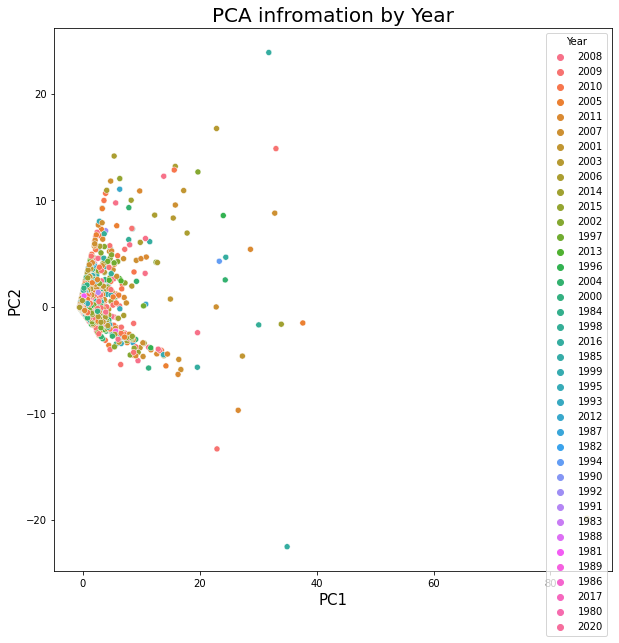

In [ ]:
#scatter plot 그리기 
'''PCA를 통한 데이터 분포는 비슷한 것으로 보인다. '''
fig23 = plt.figure(figsize=(10,10))
ax=fig23.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('PCA infromation by Year',fontsize=20)

sns.scatterplot(data=year_finalDf,x='PC1',y='PC2',hue='Year')

#### 데이터 재파악

In [ ]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000
mean,26.060280,14.526445,7.705375,4.777661
std,81.469229,50.617287,30.626823,18.951640
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,0.000000,1.000000
75%,23.000000,11.000000,4.000000,3.000000
max,4149.000000,2902.000000,1022.000000,1057.000000


### 칼럼 별 현황

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0


In [ ]:
df['SUM_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] # Feature engineering을 통해 SUM_Sales 만들어줌
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0,20.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0,1.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0,79.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0,38.0


#### 지역 별 전체 대비 비율 

In [ ]:
#전체 지역 대비 각 지역을 나눠 줄 생각이다. (Feature engineering)

In [ ]:
df5= df.iloc[:,5:] #추출해주었다.
df5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,4.0,0.0,0.0,0.0,4.0
1,17.0,0.0,0.0,1.0,18.0
2,0.0,0.0,2.0,0.0,2.0
3,4.0,0.0,0.0,0.0,4.0
4,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...
16593,15.0,4.0,0.0,1.0,20.0
16594,1.0,0.0,0.0,0.0,1.0
16595,44.0,19.0,3.0,13.0,79.0
16596,5.0,5.0,25.0,3.0,38.0


In [ ]:
#feature engineering 해서 비율 계산 완료

In [ ]:
df5['NA_sales_percent'] = df5['NA_Sales']/df5['SUM_Sales']*100
df5['EU_Sales_percent'] = df5['EU_Sales']/df5['SUM_Sales']*100
df5['JP_Sales_percent'] = df5['JP_Sales']/df5['SUM_Sales']*100
df5['Other_Sales_percent']=df5['Other_Sales']/df5['SUM_Sales']*100
df5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales,NA_sales_percent,EU_Sales_percent,JP_Sales_percent,Other_Sales_percent
0,4.0,0.0,0.0,0.0,4.0,100.000000,0.000000,0.000000,0.000000
1,17.0,0.0,0.0,1.0,18.0,94.444444,0.000000,0.000000,5.555556
2,0.0,0.0,2.0,0.0,2.0,0.000000,0.000000,100.000000,0.000000
3,4.0,0.0,0.0,0.0,4.0,100.000000,0.000000,0.000000,0.000000
4,12.0,9.0,0.0,4.0,25.0,48.000000,36.000000,0.000000,16.000000
...,...,...,...,...,...,...,...,...,...
16593,15.0,4.0,0.0,1.0,20.0,75.000000,20.000000,0.000000,5.000000
16594,1.0,0.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.000000
16595,44.0,19.0,3.0,13.0,79.0,55.696203,24.050633,3.797468,16.455696
16596,5.0,5.0,25.0,3.0,38.0,13.157895,13.157895,65.789474,7.894737


In [ ]:
name_index = df['Name']
platform_index =df['Platform']
genre_index = df['Genre']
publisher_index = df['Publisher']

In [ ]:
na_sales_per = df5['NA_sales_percent']
#na_sales_per = pd.DataFrame(na_sales_per)
#na_sales_per

eu_sales_per = df5['EU_Sales_percent']
#eu_sales_per = pd.DataFrame(eu_sales_per)
#eu_sales_per

jp_sales_per = df5['JP_Sales_percent']
#jp_sales_per = pd.DataFrame(jp_sales_per)
#jp_sales_per

other_sales_per = df5['Other_Sales_percent']
#other_sales_per = pd.DataFrame(other_sales_per)
#other_sales_per

In [ ]:
na_genre_per = pd.concat([genre_index,na_sales_per],axis=1)
na_name_per = pd.concat([name_index,na_sales_per],axis=1)
na_platform_per = pd.concat([platform_index,na_sales_per],axis=1)
na_publisher_per = pd.concat([publisher_index,na_sales_per],axis=1)

In [ ]:
na_genre_per #장르별 Sales 전체 대비 NA sales 비중

,Genre,NA_sales_percent
0,Action,100.000000
1,Action,94.444444
2,Adventure,0.000000
3,Misc,100.000000
4,Platform,48.000000
...,...,...
16593,Platform,75.000000
16594,Action,100.000000
16595,Sports,55.696203
16596,Action,13.157895


In [ ]:
# 참고용

In [ ]:
na_genre_per_wide = na_genre_per.pivot_table(index = 'Genre')
na_genre_per_wide = na_genre_per_wide.T
na_genre_per_wide

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_sales_percent,46.858903,26.928884,41.957805,48.109426,57.564583,56.547505,55.120454,29.687134,54.005149,48.102312,52.276064,29.148526


In [ ]:
melt_na_genre = na_genre_per.melt(id_vars='Genre',value_vars='NA_sales_percent')
melt_na_genre

,Genre,variable,value
0,Action,NA_sales_percent,100.000000
1,Action,NA_sales_percent,94.444444
2,Adventure,NA_sales_percent,0.000000
3,Misc,NA_sales_percent,100.000000
4,Platform,NA_sales_percent,48.000000
...,...,...,...
16236,Platform,NA_sales_percent,75.000000
16237,Action,NA_sales_percent,100.000000
16238,Sports,NA_sales_percent,55.696203
16239,Action,NA_sales_percent,13.157895


In [ ]:
eu_genre_per = pd.concat([genre_index,eu_sales_per],axis=1)
eu_name_per = pd.concat([name_index,eu_sales_per],axis=1)
eu_platform_per = pd.concat([platform_index,eu_sales_per],axis=1)
eu_publisher_per = pd.concat([publisher_index,eu_sales_per],axis=1)

In [ ]:
eu_genre_per #장르별 Sales 전체 대비 NA sales 비중

,Genre,EU_Sales_percent
0,Action,0.000000
1,Action,0.000000
2,Adventure,0.000000
3,Misc,0.000000
4,Platform,36.000000
...,...,...
16593,Platform,20.000000
16594,Action,0.000000
16595,Sports,24.050633
16596,Action,13.157895


In [ ]:
melt_eu_genre = eu_genre_per.melt(id_vars='Genre',value_vars='EU_Sales_percent')
melt_eu_genre #장르별 Sales 전체 대비 NA sales 비중 melt

,Genre,variable,value
0,Action,EU_Sales_percent,0.000000
1,Action,EU_Sales_percent,0.000000
2,Adventure,EU_Sales_percent,0.000000
3,Misc,EU_Sales_percent,0.000000
4,Platform,EU_Sales_percent,36.000000
...,...,...,...
16236,Platform,EU_Sales_percent,20.000000
16237,Action,EU_Sales_percent,0.000000
16238,Sports,EU_Sales_percent,24.050633
16239,Action,EU_Sales_percent,13.157895


In [ ]:
jp_genre_per = pd.concat([genre_index,jp_sales_per],axis=1)
jp_name_per = pd.concat([name_index,jp_sales_per],axis=1)
jp_platform_per = pd.concat([platform_index,jp_sales_per],axis=1)
jp_publisher_per = pd.concat([publisher_index,jp_sales_per],axis=1)

In [ ]:
eu_genre_per #장르별 Sales 전체 대비 EU sales 비중

,Genre,EU_Sales_percent
0,Action,0.000000
1,Action,0.000000
2,Adventure,0.000000
3,Misc,0.000000
4,Platform,36.000000
...,...,...
16593,Platform,20.000000
16594,Action,0.000000
16595,Sports,24.050633
16596,Action,13.157895


In [ ]:
melt_jp_genre = jp_genre_per.melt(id_vars='Genre',value_vars='JP_Sales_percent')
melt_jp_genre #장르별 Sales 전체 대비 jp sales 비중 melt

,Genre,variable,value
0,Action,JP_Sales_percent,0.000000
1,Action,JP_Sales_percent,0.000000
2,Adventure,JP_Sales_percent,100.000000
3,Misc,JP_Sales_percent,0.000000
4,Platform,JP_Sales_percent,0.000000
...,...,...,...
16236,Platform,JP_Sales_percent,0.000000
16237,Action,JP_Sales_percent,0.000000
16238,Sports,JP_Sales_percent,3.797468
16239,Action,JP_Sales_percent,65.789474


In [ ]:
other_genre_per = pd.concat([genre_index,other_sales_per],axis=1)
other_name_per = pd.concat([name_index,other_sales_per],axis=1)
other_platform_per = pd.concat([platform_index,other_sales_per],axis=1)
other_publisher_per = pd.concat([publisher_index,other_sales_per],axis=1)

In [ ]:
melt_other_genre = other_genre_per.melt(id_vars='Genre',value_vars='Other_Sales_percent')
melt_other_genre #장르별 Sales 전체 대비 jp sales 비중 melt

,Genre,variable,value
0,Action,Other_Sales_percent,0.000000
1,Action,Other_Sales_percent,5.555556
2,Adventure,Other_Sales_percent,0.000000
3,Misc,Other_Sales_percent,0.000000
4,Platform,Other_Sales_percent,16.000000
...,...,...,...
16236,Platform,Other_Sales_percent,5.000000
16237,Action,Other_Sales_percent,0.000000
16238,Sports,Other_Sales_percent,16.455696
16239,Action,Other_Sales_percent,7.894737


#### 플랫폼에 따른  Sales (SUM 포함)

In [ ]:
gb_platform= df.groupby('Platform').sum()
gb_platform = pd.DataFrame(gb_platform) #새로운 데이터 프레임 생성
gb_platform.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Platform,,,,,
2600,8032.0,472.0,0.0,83.0,8587.0
3DO,0.0,0.0,10.0,0.0,10.0
3DS,7231.0,5377.0,9275.0,1154.0,23037.0
DC,543.0,169.0,856.0,27.0,1595.0
DS,38276.0,19257.0,17372.0,6005.0,80910.0


In [ ]:
tgb_platform= gb_platform.T
tgb_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
NA_Sales,8032.0,0.0,7231.0,543.0,38276.0,11364.0,17328.0,13116.0,1927.0,0.0,12809.0,12542.0,0.0,9119.0,0.0,32847.0,56289.0,38417.0,9215.0,10594.0,1547.0,38.0,100.0,6123.0,0.0,0.0,48960.0,3714.0,57177.0,17806.0,8131.0
EU_Sales,472.0,0.0,5377.0,169.0,19257.0,4751.0,7160.0,3776.0,552.0,0.0,3753.0,2115.0,0.0,13549.0,0.0,20903.0,32727.0,33290.0,12252.0,6681.0,1619.0,54.0,36.0,1904.0,0.0,0.0,25882.0,2356.0,27120.0,5759.0,4410.0
JP_Sales,0.0,10.0,9275.0,856.0,17372.0,8193.0,4341.0,2087.0,241.0,4.0,3241.0,9865.0,144.0,17.0,3.0,13271.0,13327.0,7794.0,1399.0,7510.0,2075.0,3119.0,45.0,11631.0,16.0,142.0,6493.0,1279.0,1221.0,138.0,34.0
Other_Sales,83.0,0.0,1154.0,27.0,6005.0,816.0,748.0,507.0,89.0,0.0,424.0,510.0,0.0,2386.0,0.0,4009.0,18649.0,13904.0,4230.0,4130.0,836.0,7.0,5.0,322.0,0.0,0.0,7804.0,645.0,8286.0,827.0,1191.0
SUM_Sales,8587.0,10.0,23037.0,1595.0,80910.0,25124.0,29577.0,19486.0,2809.0,4.0,20227.0,25032.0,144.0,25071.0,3.0,71030.0,120992.0,93405.0,27096.0,28915.0,6077.0,3218.0,186.0,19980.0,16.0,142.0,89139.0,7994.0,93804.0,24530.0,13766.0


In [ ]:
tgb_platform.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

#### 플랫봄 비 세일즈 (SUM 제외)

In [ ]:
#지역별 Sales 파악 가능 자료
#label 나눠놨으니 병합해서 파악 가능

In [ ]:
raw_df = df.iloc[:,5:-1]
raw_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,4.0,0.0,0.0,0.0
1,17.0,0.0,0.0,1.0
2,0.0,0.0,2.0,0.0
3,4.0,0.0,0.0,0.0
4,12.0,9.0,0.0,4.0
...,...,...,...,...
16593,15.0,4.0,0.0,1.0
16594,1.0,0.0,0.0,0.0
16595,44.0,19.0,3.0,13.0
16596,5.0,5.0,25.0,3.0


In [ ]:
Sales_label=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

In [ ]:
tgb_platform_sales_sum = gb_platform[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
tgb_platform_sales_sum= tgb_platform_sales_sum.T
tgb_platform_sales_sum

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
NA_Sales,8032.0,0.0,7231.0,543.0,38276.0,11364.0,17328.0,13116.0,1927.0,0.0,12809.0,12542.0,0.0,9119.0,0.0,32847.0,56289.0,38417.0,9215.0,10594.0,1547.0,38.0,100.0,6123.0,0.0,0.0,48960.0,3714.0,57177.0,17806.0,8131.0
EU_Sales,472.0,0.0,5377.0,169.0,19257.0,4751.0,7160.0,3776.0,552.0,0.0,3753.0,2115.0,0.0,13549.0,0.0,20903.0,32727.0,33290.0,12252.0,6681.0,1619.0,54.0,36.0,1904.0,0.0,0.0,25882.0,2356.0,27120.0,5759.0,4410.0
JP_Sales,0.0,10.0,9275.0,856.0,17372.0,8193.0,4341.0,2087.0,241.0,4.0,3241.0,9865.0,144.0,17.0,3.0,13271.0,13327.0,7794.0,1399.0,7510.0,2075.0,3119.0,45.0,11631.0,16.0,142.0,6493.0,1279.0,1221.0,138.0,34.0
Other_Sales,83.0,0.0,1154.0,27.0,6005.0,816.0,748.0,507.0,89.0,0.0,424.0,510.0,0.0,2386.0,0.0,4009.0,18649.0,13904.0,4230.0,4130.0,836.0,7.0,5.0,322.0,0.0,0.0,7804.0,645.0,8286.0,827.0,1191.0


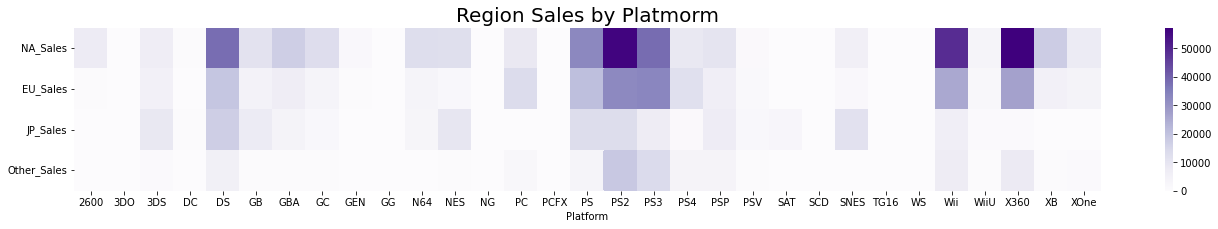

In [ ]:
fig= plt.figure(figsize=(23,3))
area20 = fig.add_subplot(1,1,1)
plt.title("Region Sales by Platmorm", fontsize=20)
sns.heatmap(tgb_platform_sales_sum, cmap='Purples')

In [ ]:
tgb_platform_tidy = tgb_platform_sales_sum.melt()
tgb_platform_tidy

,Platform,value
0,2600,8032.0
1,2600,472.0
2,2600,0.0
3,2600,83.0
4,3DO,0.0
...,...,...
119,XB,827.0
120,XOne,8131.0
121,XOne,4410.0
122,XOne,34.0


In [ ]:
# 큰 순서대로 정렬하기

In [ ]:
tgb_platform_tidy=tgb_platform_tidy.sort_values(by='value',ascending=False)
tgb_platform_tidy

,Platform,value
112,X360,57177.0
64,PS2,56289.0
104,Wii,48960.0
68,PS3,38417.0
16,DS,38276.0
...,...,...
103,WS,0.0
96,TG16,0.0
101,WS,0.0
100,WS,0.0


#### 장르 별 Sales

In [ ]:
gb_Genre= df.groupby('Genre').sum()
gb_Genre = pd.DataFrame(gb_Genre) #새로운 데이터 프레임 생성
gb_Genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Genre,,,,,
Action,83728.0,50661.0,15516.0,18265.0,168170.0
Adventure,10103.0,6347.0,5179.0,1642.0,23271.0
Fighting,21899.0,9848.0,8580.0,3565.0,43892.0
Misc,39064.0,20533.0,10376.0,7218.0,77191.0
Platform,44016.0,19301.0,12974.0,5097.0,81388.0


In [ ]:
gb_Genre_delSUM = gb_Genre.iloc[:,:-1]
gb_Genre_delSUM

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,83728.0,50661.0,15516.0,18265.0
Adventure,10103.0,6347.0,5179.0,1642.0
Fighting,21899.0,9848.0,8580.0,3565.0
Misc,39064.0,20533.0,10376.0,7218.0
Platform,44016.0,19301.0,12974.0,5097.0
Puzzle,12150.0,5006.0,5624.0,1239.0
Racing,34275.0,23298.0,5604.0,7609.0
Role-Playing,31716.0,18148.0,33115.0,5511.0
Shooter,56205.0,30411.0,3812.0,10112.0


In [ ]:
Genre_total_Sales = gb_Genre['NA_Sales']+gb_Genre['EU_Sales']+gb_Genre['JP_Sales']+gb_Genre['Other_Sales']
Genre_total_Sales = pd.DataFrame(Genre_total_Sales).T
Genre_total_Sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,168170.0,23271.0,43892.0,77191.0,81388.0,24019.0,70786.0,88490.0,100540.0,38358.0,128755.0,17046.0


#### Publisher 별 Sales

In [ ]:
gb_publisher= df.groupby('Publisher').sum()
gb_publisher = gb_publisher.iloc[:,:]
gb_publisher = pd.DataFrame(gb_publisher) #새로운 데이터 프레임 생성
gb_pulisher= gb_publisher.sort_values(by='SUM_Sales',ascending=False)
gb_publisher.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Publisher,,,,,
10TACLE Studios,7.0,4.0,0.0,0.0,11.0
1C Company,1.0,7.0,0.0,2.0,10.0
20th Century Fox Video Games,182.0,10.0,0.0,1.0,193.0
2D Boy,0.0,3.0,0.0,1.0,4.0
3DO,648.0,304.0,0.0,63.0,1015.0
49Games,0.0,4.0,0.0,0.0,4.0
505 Games,2954.0,1641.0,197.0,543.0,5335.0
5pb,2.0,0.0,161.0,0.0,163.0
7G//AMES,0.0,6.0,0.0,0.0,6.0


In [ ]:
gb_publisher['NA_Sales'].value_counts() #미국 publisher 매출 없는 것 190

0.0        190
1.0         18
2.0         15
3.0         13
16.0        11
          ... 
1050.0       1
674.0        1
79260.0      1
8706.0       1
117.0        1
Name: NA_Sales, Length: 185, dtype: int64

In [ ]:
gb_publisher['EU_Sales'].value_counts() #EU publisher 매출 없는 것 204

0.0        204
2.0         31
4.0         28
1.0         27
3.0         19
          ... 
11668.0      1
35804.0      1
40669.0      1
1641.0       1
95.0         1
Name: EU_Sales, Length: 145, dtype: int64

In [ ]:
gb_publisher['JP_Sales'].value_counts() #일본 publisher 매출 없는 것 276

0.0        276
2.0         29
3.0         22
1.0         19
6.0         14
          ... 
43920.0      1
666.0        1
327.0        1
3240.0       1
134.0        1
Name: JP_Sales, Length: 124, dtype: int64

In [ ]:
gb_publisher['Other_Sales'].value_counts() #타지역 publisher 매출 없는 것

0.0       223
1.0        76
2.0        35
3.0        24
4.0        20
         ... 
114.0       1
1695.0      1
38.0        1
102.0       1
9327.0      1
Name: Other_Sales, Length: 91, dtype: int64

In [ ]:
gb_publisher_sorted = gb_publisher.sort_values(by='SUM_Sales',ascending=False)
gb_publisher_sorted

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Publisher,,,,,
Nintendo,79260.0,40669.0,43920.0,9327.0,173176.0
Electronic Arts,57260.0,35804.0,1396.0,12550.0,107010.0
Activision,41717.0,20828.0,653.0,7422.0,70620.0
Sony Computer Entertainment,25912.0,18620.0,7356.0,7910.0,59798.0
Ubisoft,25023.0,16031.0,732.0,4951.0,46737.0
...,...,...,...,...,...
UIG Entertainment,0.0,1.0,0.0,0.0,1.0
Otomate,0.0,0.0,1.0,0.0,1.0
Piacci,0.0,0.0,0.0,0.0,0.0


In [ ]:
gb_publisher_sorted_top20= gb_publisher_sorted.iloc[0:20]
gb_publisher_sorted_top20 = gb_publisher_sorted_top20.iloc[:,:-1]
gb_publisher_sorted_top20

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Nintendo,79260.0,40669.0,43920.0,9327.0
Electronic Arts,57260.0,35804.0,1396.0,12550.0
Activision,41717.0,20828.0,653.0,7422.0
Sony Computer Entertainment,25912.0,18620.0,7356.0,7910.0
Ubisoft,25023.0,16031.0,732.0,4951.0
Take-Two Interactive,20786.0,11668.0,583.0,5459.0
THQ,20723.0,9274.0,497.0,3158.0
Konami Digital Entertainment,8706.0,6813.0,9037.0,2984.0
Sega,10760.0,7972.0,5397.0,2420.0


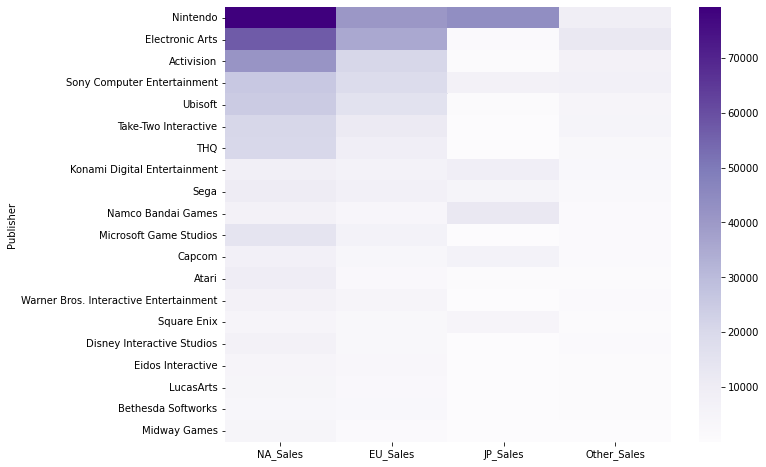

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=gb_publisher_sorted_top20,cmap='Purples')

In [ ]:
# 지역 별 매출 총합

In [ ]:
gb_publisher['NA_Sales'].sum()

423245.0

In [ ]:
gb_publisher['EU_Sales'].sum()

235924.0

In [ ]:
gb_publisher['JP_Sales'].sum()

125143.0

In [ ]:
gb_publisher['Other_Sales'].sum()

77594.0

#### 전체 Platform Sales 시각화

In [ ]:
import seaborn as sns

In [ ]:
#x_label = ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64','NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV','SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB','XOne']
#x_label_index = np.arange(len(x_label))

In [ ]:
gb_platform['Sales sum']=gb_platform['NA_Sales']+gb_platform['EU_Sales']+gb_platform['JP_Sales']+gb_platform['Other_Sales']
gb_platform.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales,Sales sum
Platform,,,,,,
2600,8032.0,472.0,0.0,83.0,8587.0,8587.0
3DO,0.0,0.0,10.0,0.0,10.0,10.0
3DS,7231.0,5377.0,9275.0,1154.0,23037.0,23037.0
DC,543.0,169.0,856.0,27.0,1595.0,1595.0
DS,38276.0,19257.0,17372.0,6005.0,80910.0,80910.0


In [ ]:
pf_Sales_sum=gb_platform['Sales sum']
pf_Sales_sum=pd.DataFrame(pf_Sales_sum)
pf_Sales_sum=pf_Sales_sum.T
pf_Sales_sum

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Sales sum,8587.0,10.0,23037.0,1595.0,80910.0,25124.0,29577.0,19486.0,2809.0,4.0,20227.0,25032.0,144.0,25071.0,3.0,71030.0,120992.0,93405.0,27096.0,28915.0,6077.0,3218.0,186.0,19980.0,16.0,142.0,89139.0,7994.0,93804.0,24530.0,13766.0


In [ ]:
pf_Sales_sum_tidy= pf_Sales_sum.melt()
pf_Sales_sum_tidy= pf_Sales_sum_tidy.sort_values(by='value',ascending=False)
pf_Sales_sum_tidy.reset_index()
pf_Sales_sum_tidy.head()

,Platform,value
16,PS2,120992.0
28,X360,93804.0
17,PS3,93405.0
26,Wii,89139.0
4,DS,80910.0


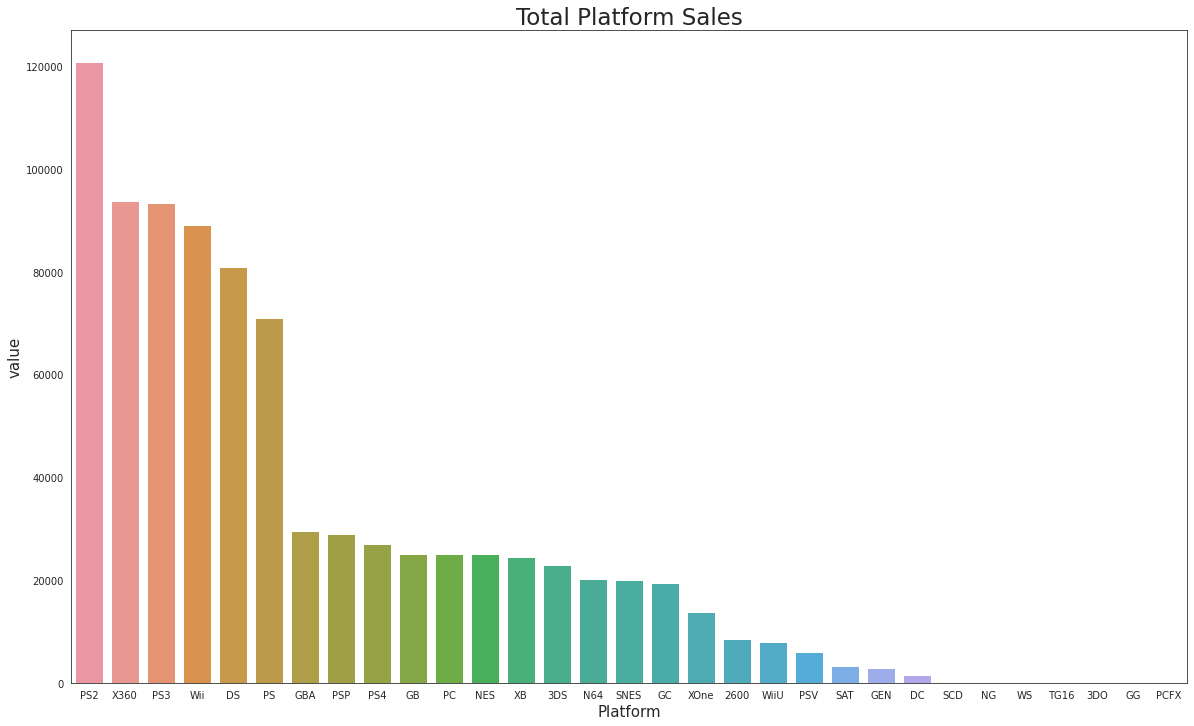

In [ ]:
sns.set_style('white')
fig= plt.figure(figsize=(20,12))
area1 = fig.add_subplot(1,1,1)
area1.set_title('Total Platform Sales',fontsize=23)
area1.set_xlabel('Platform',fontsize=15)
area1.set_ylabel('value',fontsize=15)
g= sns.barplot(data=pf_Sales_sum_tidy,x='Platform',y='value',ax=area1)
GP_vis= plt.show(g)
GP_vis

### 지역에 따른 선호 장르

#### 전체 지역 선호 장르

In [ ]:
# 지역별 Sales 시각화 하기 위한 전단계

In [ ]:
Genre_tidy=gb_Genre.melt()

In [ ]:
Genre_tidy_SUMdel =gb_Genre_delSUM.melt()

In [ ]:
Genre_tidy_SUMdel = Genre_tidy_SUMdel.sort_values(by='value',ascending=False)
Genre_tidy_SUMdel.head()

,variable,value
0,NA_Sales,83728.0
10,NA_Sales,65592.0
8,NA_Sales,56205.0
12,EU_Sales,50661.0
4,NA_Sales,44016.0


In [ ]:
Genre_tidy = Genre_tidy.sort_values(by='value',ascending=False)
Genre_tidy.head()

,variable,value
48,SUM_Sales,168170.0
58,SUM_Sales,128755.0
56,SUM_Sales,100540.0
55,SUM_Sales,88490.0
0,NA_Sales,83728.0


In [ ]:
# sales by region (총 Sales가 제외)

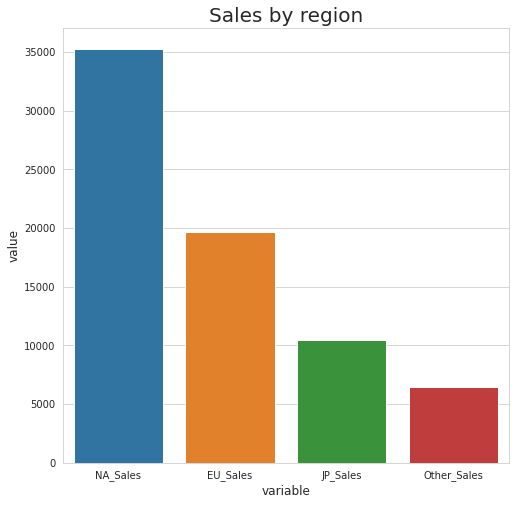

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(8,8))
area2 = fig.add_subplot(1,1,1)
area2.set_title('Sales by region',fontsize=20)
area2.set_xlabel('Genre',fontsize=12)
area2.set_ylabel('value',fontsize=12)
#for p in ax.patches:
#    left, bottom, width, height = p.get_bbox().bounds
#    ax.annotate("%.1f m"%(height/1e6), (left+width/2, height*1.01), ha='center')
#color=['black','dimgray','gray','darkgray','silver']
g2= sns.barplot(data=Genre_tidy_SUMdel,x='variable',y='value',ax=area2,ci=None)
Genre_t_vis= plt.show(g2)
Genre_t_vis

In [ ]:
# 지역별 Sales (총 Sales 포함)

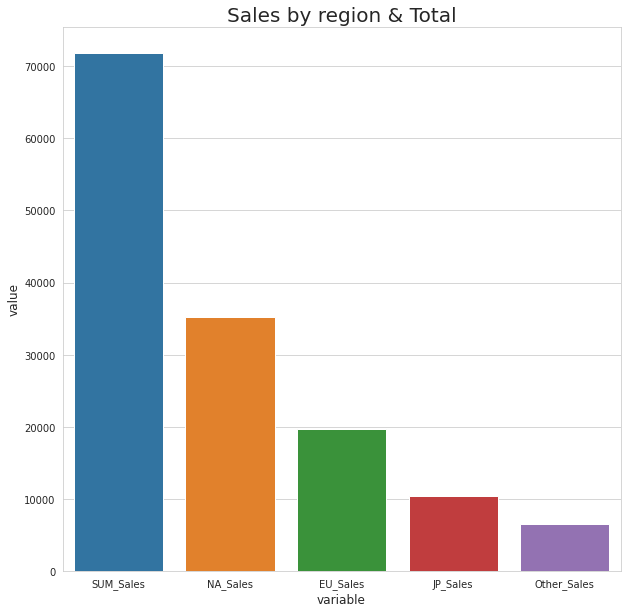

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(10,10))
area2 = fig.add_subplot(1,1,1)
area2.set_title('Sales by region & Total',fontsize=20)
area2.set_xlabel('Genre',fontsize=12)
area2.set_ylabel('value',fontsize=12)
g2= sns.barplot(data=Genre_tidy,x='variable',y='value',ax=area2,ci=None)
Genre_t_vis= plt.show(g2)
Genre_t_vis

In [ ]:
# 장르 선호 시각화 전 단계

In [ ]:
Genre_total_Sales = Genre_total_Sales.melt().sort_values(by='value',ascending=False)
Genre_total_Sales

,Genre,value
0,Action,168170.0
10,Sports,128755.0
8,Shooter,100540.0
7,Role-Playing,88490.0
4,Platform,81388.0
3,Misc,77191.0
6,Racing,70786.0
2,Fighting,43892.0
9,Simulation,38358.0
5,Puzzle,24019.0


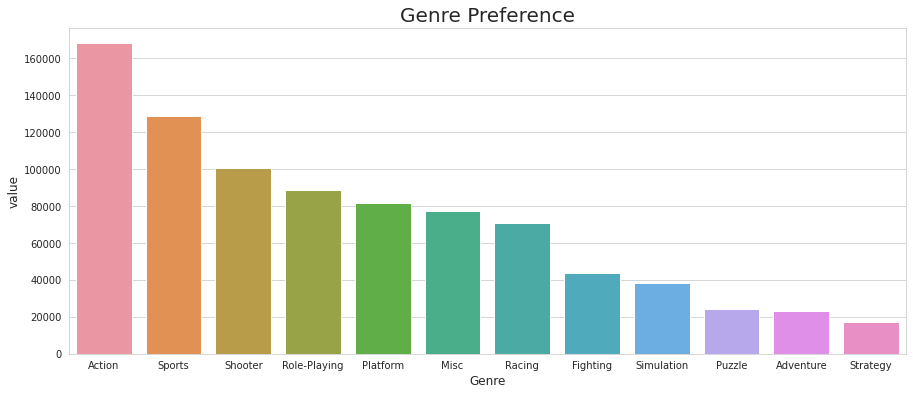

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(15,6))
area11 = fig.add_subplot(1,1,1)
area11.set_title('Genre Preference',fontsize=20)
area11.set_xlabel('Genre',fontsize=12)
area11.set_ylabel('value',fontsize=12)
g11= sns.barplot(data=Genre_total_Sales,x='Genre',y='value',ax=area11,ci=None)
total_genre_vis= plt.show(g11)
total_genre_vis

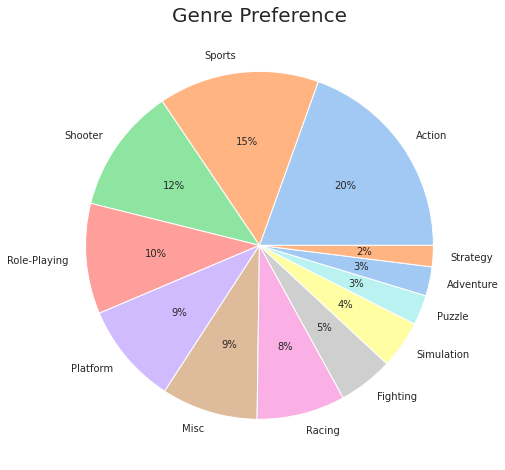

In [ ]:
sns.set_style('white')
fig12= plt.figure(figsize=(8,8))
area12 = fig12.add_subplot(1,1,1)
area12.set_title('Genre Preference',fontsize=20)

#define data
labels= Genre_total_Sales['Genre']
data = Genre_total_Sales['value']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g12= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_total_genre= plt.show(g12)
pie_total_genre

#### North America genre preference

In [ ]:
na_genre=gb_Genre['NA_Sales']
na_genre_tidy = pd.DataFrame(na_genre)
na_genre_tidy = na_genre_tidy.T
na_genre_tidy = na_genre_tidy.melt().sort_values(by='value',ascending=False)
na_genre_tidy

,Genre,value
0,Action,83728.0
10,Sports,65592.0
8,Shooter,56205.0
4,Platform,44016.0
3,Misc,39064.0
6,Racing,34275.0
7,Role-Playing,31716.0
2,Fighting,21899.0
9,Simulation,17819.0
5,Puzzle,12150.0


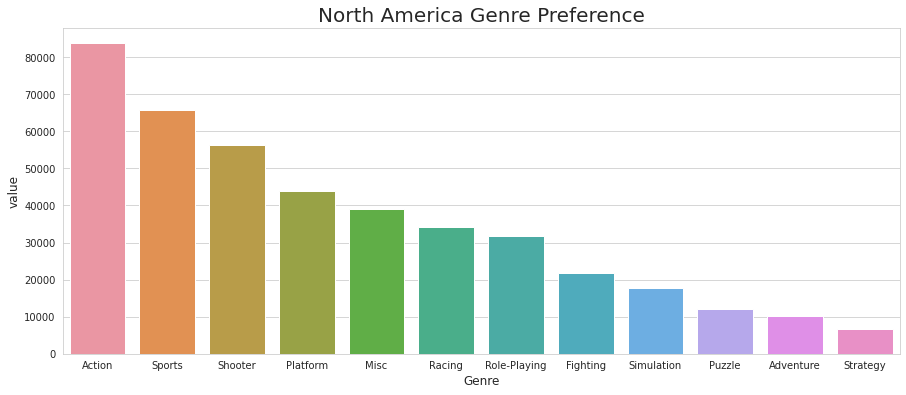

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(15,6))
area3 = fig.add_subplot(1,1,1)
area3.set_title('North America Genre Preference',fontsize=20)
area3.set_xlabel('Genre',fontsize=12)
area3.set_ylabel('value',fontsize=12)
g3= sns.barplot(data=na_genre_tidy,x='Genre',y='value',ax=area3,ci=None)
na_genre_vis= plt.show(g3)
na_genre_vis

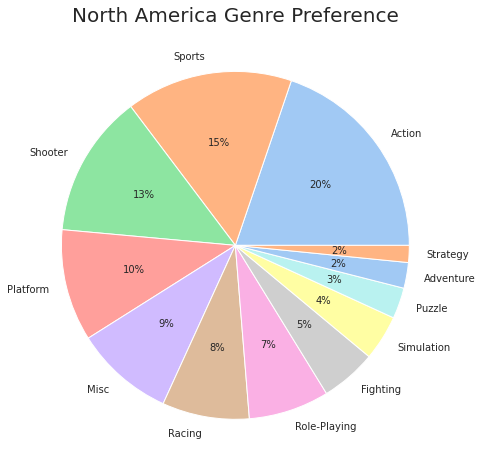

In [ ]:
sns.set_style('white')
fig8= plt.figure(figsize=(8,8))
area8 = fig8.add_subplot(1,1,1)
area8.set_title('North America Genre Preference',fontsize=20)

#define data
labels= na_genre_tidy['Genre']
data = na_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g8= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_na_genre= plt.show(g8)
pie_na_genre

#### EU genre preference

In [ ]:
eu_genre=gb_Genre['EU_Sales']
eu_genre_tidy = pd.DataFrame(eu_genre)
eu_genre_tidy = eu_genre_tidy.T
eu_genre_tidy = eu_genre_tidy.melt().sort_values(by='value',ascending=False)
eu_genre_tidy

,Genre,value
0,Action,50661.0
10,Sports,36713.0
8,Shooter,30411.0
6,Racing,23298.0
3,Misc,20533.0
4,Platform,19301.0
7,Role-Playing,18148.0
9,Simulation,11188.0
2,Fighting,9848.0
1,Adventure,6347.0


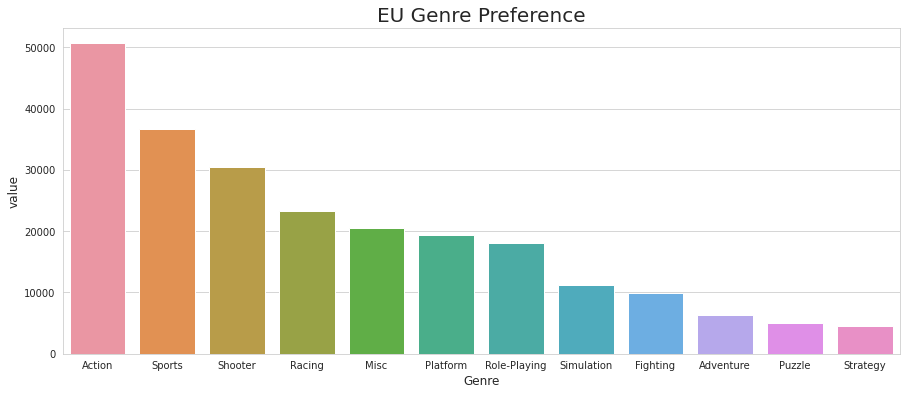

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(15,6))
area4 = fig.add_subplot(1,1,1)
area4.set_title('EU Genre Preference',fontsize=20)
area4.set_xlabel('Genre',fontsize=12)
area4.set_ylabel('value',fontsize=12)
g4= sns.barplot(data=eu_genre_tidy,x='Genre',y='value',ax=area4,ci=None)
eu_genre_vis= plt.show(g4)
eu_genre_vis

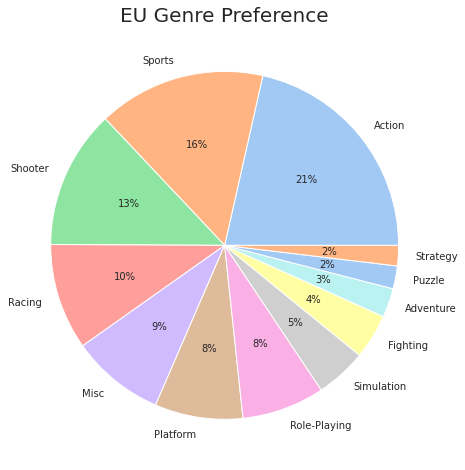

In [ ]:
sns.set_style('white')
fig9= plt.figure(figsize=(8,8))
area9 = fig9.add_subplot(1,1,1)
area9.set_title('EU Genre Preference',fontsize=20)

#define data
labels= eu_genre_tidy['Genre']
data = eu_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g9= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_eu_genre= plt.show(g9)
pie_eu_genre

#### Japan genre preference

In [ ]:
jp_genre=gb_Genre['JP_Sales']
jp_genre_tidy = pd.DataFrame(jp_genre)
jp_genre_tidy = jp_genre_tidy.T
jp_genre_tidy = jp_genre_tidy.melt().sort_values(by='value',ascending=False)
jp_genre_tidy

,Genre,value
7,Role-Playing,33115.0
0,Action,15516.0
10,Sports,13331.0
4,Platform,12974.0
3,Misc,10376.0
2,Fighting,8580.0
9,Simulation,6226.0
5,Puzzle,5624.0
6,Racing,5604.0
1,Adventure,5179.0


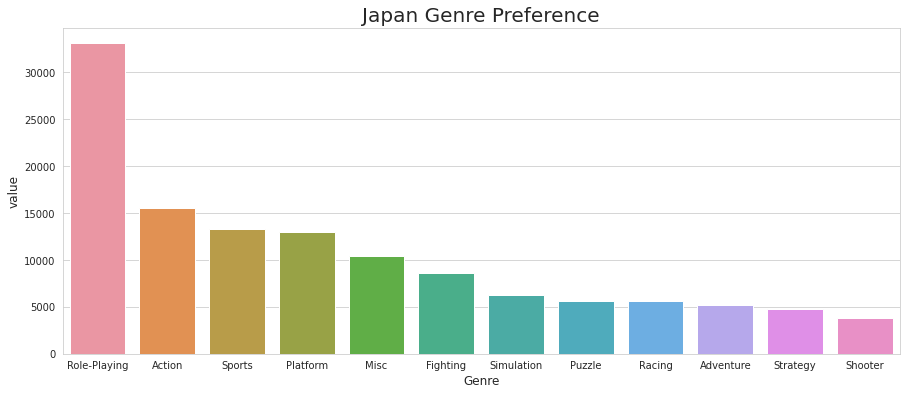

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(15,6))
area5 = fig.add_subplot(1,1,1)
area5.set_title('Japan Genre Preference',fontsize=20)
area5.set_xlabel('Genre',fontsize=12)
area5.set_ylabel('value',fontsize=12)
g5= sns.barplot(data=jp_genre_tidy,x='Genre',y='value',ax=area5,ci=None)
jp_genre_vis= plt.show(g5)
jp_genre_vis

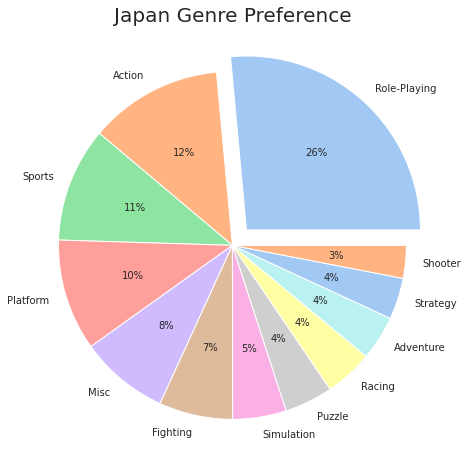

In [ ]:
sns.set_style('white')
fig10= plt.figure(figsize=(8,8))
area10 = fig10.add_subplot(1,1,1)
area10.set_title('Japan Genre Preference',fontsize=20)

#define data
labels= jp_genre_tidy['Genre']
data = jp_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g10= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',explode=[0.12,0,0,0,0,0,0,0,0,0,0,0])
pie_jp_genre= plt.show(g10)
pie_jp_genre

#### Other genre preference

In [ ]:
other_genre=gb_Genre['Other_Sales']
other_genre_tidy = pd.DataFrame(other_genre)
other_genre_tidy = other_genre_tidy.T
other_genre_tidy = other_genre_tidy.melt().sort_values(by='value',ascending=False)
other_genre_tidy

,Genre,value
0,Action,18265.0
10,Sports,13119.0
8,Shooter,10112.0
6,Racing,7609.0
3,Misc,7218.0
7,Role-Playing,5511.0
4,Platform,5097.0
2,Fighting,3565.0
9,Simulation,3125.0
1,Adventure,1642.0


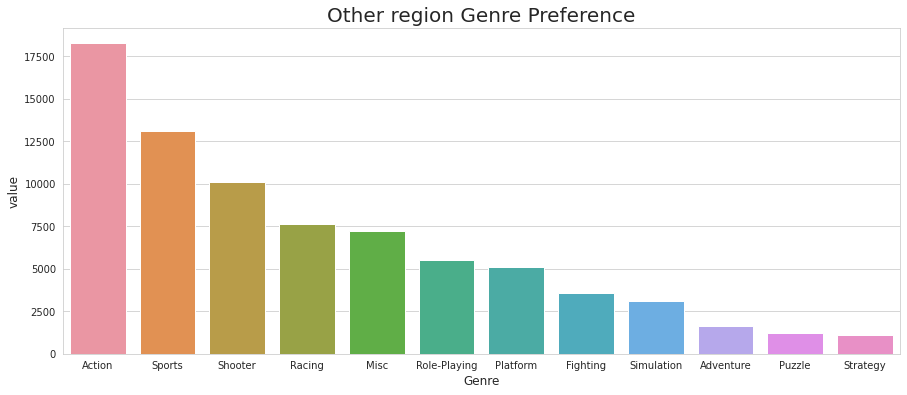

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(15,6))
area6 = fig.add_subplot(1,1,1)
area6.set_title('Other region Genre Preference',fontsize=20)
area6.set_xlabel('Genre',fontsize=12)
area6.set_ylabel('value',fontsize=12)
g6= sns.barplot(data=other_genre_tidy,x='Genre',y='value',ax=area6,ci=None)
other_genre_vis= plt.show(g6)
other_genre_vis

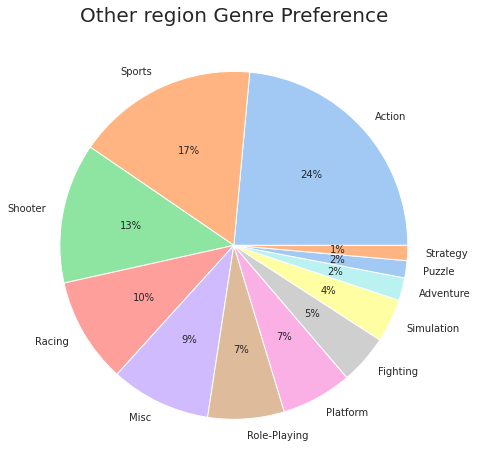

In [ ]:
sns.set_style('white')
fig7= plt.figure(figsize=(8,8))
area7 = fig7.add_subplot(1,1,1)
area7.set_title('Other region Genre Preference',fontsize=20)

#define data
labels= other_genre_tidy['Genre']
data = other_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g7= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_other_genre= plt.show(g7)
pie_other_genre

#### 지역 따른 선호 다른 차트

In [ ]:
gb_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Genre,,,,,
Action,83728.0,50661.0,15516.0,18265.0,168170.0
Adventure,10103.0,6347.0,5179.0,1642.0,23271.0
Fighting,21899.0,9848.0,8580.0,3565.0,43892.0
Misc,39064.0,20533.0,10376.0,7218.0,77191.0
Platform,44016.0,19301.0,12974.0,5097.0,81388.0
Puzzle,12150.0,5006.0,5624.0,1239.0,24019.0
Racing,34275.0,23298.0,5604.0,7609.0,70786.0
Role-Playing,31716.0,18148.0,33115.0,5511.0,88490.0
Shooter,56205.0,30411.0,3812.0,10112.0,100540.0


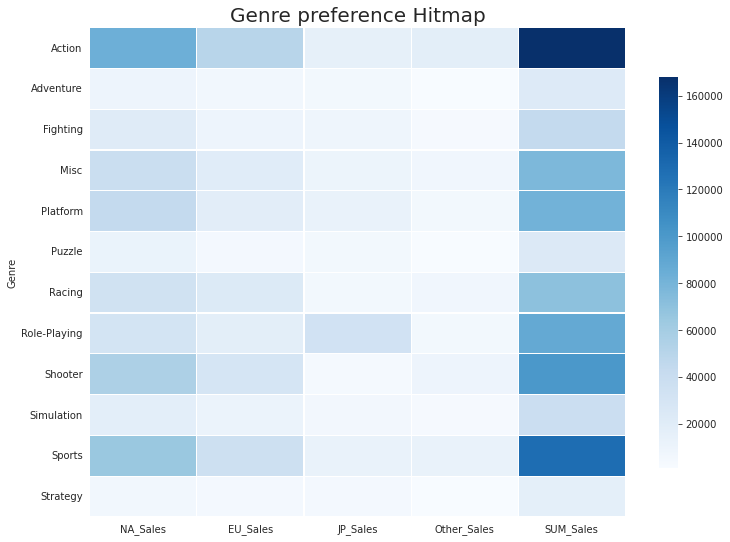

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(gb_Genre, cmap="Blues",
           linewidth=0.2, cbar_kws={"shrink": .8})
plt.title('Genre preference Hitmap', fontsize=20)
plt.show()

In [ ]:
gb_Genre_delSUM

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,83728.0,50661.0,15516.0,18265.0
Adventure,10103.0,6347.0,5179.0,1642.0
Fighting,21899.0,9848.0,8580.0,3565.0
Misc,39064.0,20533.0,10376.0,7218.0
Platform,44016.0,19301.0,12974.0,5097.0
Puzzle,12150.0,5006.0,5624.0,1239.0
Racing,34275.0,23298.0,5604.0,7609.0
Role-Playing,31716.0,18148.0,33115.0,5511.0
Shooter,56205.0,30411.0,3812.0,10112.0


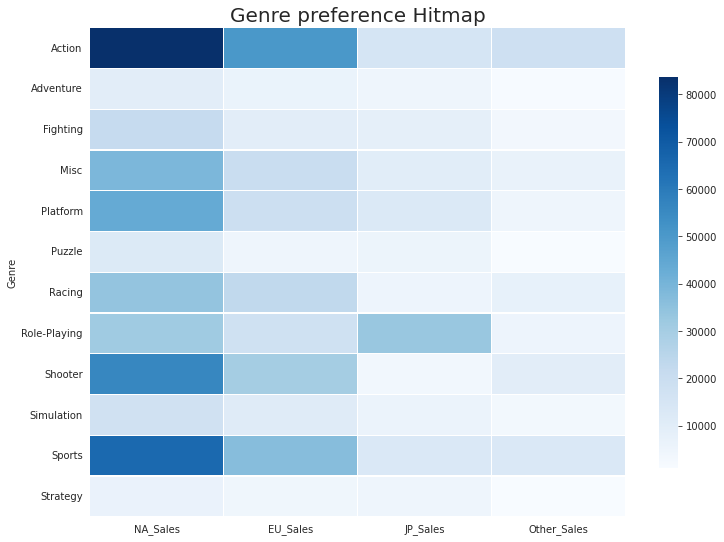

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(gb_Genre_delSUM, cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.title('Genre preference Hitmap', fontsize=20)
plt.show()

### 연도별 게임 트랜드 파악하기

In [ ]:
#Year,Genre, Sales_sum이 필요

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0


In [ ]:
Year_Trend_df = df[['Year','Genre','SUM_Sales']] #Tidy-Format
Year_Trend_df = Year_Trend_df.sort_values(by='Year',ascending=True)
Year_Trend_df

,Year,Genre,SUM_Sales
14264,1980,Fighting,77.0
13133,1980,Action,34.0
10121,1980,Misc,105.0
7317,1980,Misc,23.0
15012,1980,Shooter,276.0
...,...,...,...
15985,None,Fighting,2.0
16103,None,Sports,1.0
16149,None,Fighting,50.0
16394,None,Shooter,2.0


In [ ]:
#wide format
Year_Trend_wide = Year_Trend_df.pivot_table(index='Genre',columns='Year', values='SUM_Sales')
Year_Trend_wide_t = Year_Trend_wide.T
Year_Trend_wide_t.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,34.000000,NaN,77.0,67.5,NaN,NaN,NaN,NaN,353.500000,NaN,NaN,NaN
1981,58.720000,NaN,NaN,NaN,230.666667,112.500000,48.000000,NaN,100.200000,44.0,19.5,NaN
1982,36.111111,NaN,NaN,87.0,100.600000,334.666667,78.500000,NaN,76.200000,NaN,53.0,NaN
1983,40.857143,40.0,NaN,214.0,138.600000,78.000000,NaN,NaN,49.000000,NaN,320.0,NaN
1984,185.000000,NaN,NaN,145.0,69.000000,104.666667,198.333333,NaN,1036.666667,NaN,308.5,NaN


In [ ]:
# 연도별 game 트랜드

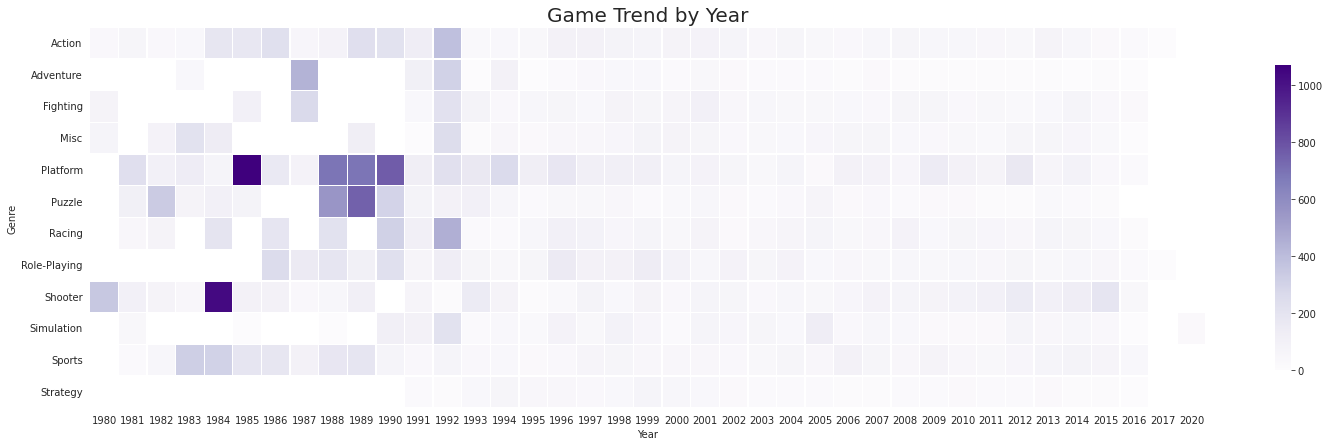

In [ ]:
fig, ax = plt.subplots(figsize=(25,7))
sns.heatmap(Year_Trend_wide, cmap="Purples",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.title('Game Trend by Year', fontsize=20)
plt.show()

In [ ]:
Year_Trend_wide_df2= Year_Trend_wide_t.iloc[-10:-2,:]
Year_Trend_wide_df2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2009,50.651852,14.642857,60.622642,37.014706,146.071429,25.512821,40.927711,45.262136,77.247191,27.073770,75.266304,19.296875
2010,51.853982,10.797386,37.200000,43.810000,99.741935,25.250000,60.842105,52.313131,87.762500,27.683544,48.989189,26.115385
2011,49.802521,14.924528,43.755102,30.366120,75.783784,11.829268,55.333333,47.172043,103.000000,27.888889,45.360656,19.711111
2012,43.969582,10.350877,30.896552,60.162162,168.545455,15.818182,48.033333,60.448718,153.914894,74.277778,57.111111,22.200000
2013,77.810811,10.966667,37.947368,61.780488,65.216216,33.333333,69.062500,42.957143,102.779661,48.222222,72.735849,27.947368
2014,53.193548,8.053333,70.772727,57.878049,88.700000,21.428571,61.888889,50.922222,135.276596,50.363636,81.722222,12.125000
2015,27.108000,15.075472,36.952381,30.289474,34.500000,11.500000,41.684211,46.415584,194.470588,37.400000,66.435484,10.705882
2016,16.888889,5.424242,27.500000,6.411765,20.800000,NaN,8.526316,16.800000,44.870968,4.333333,38.324324,5.200000


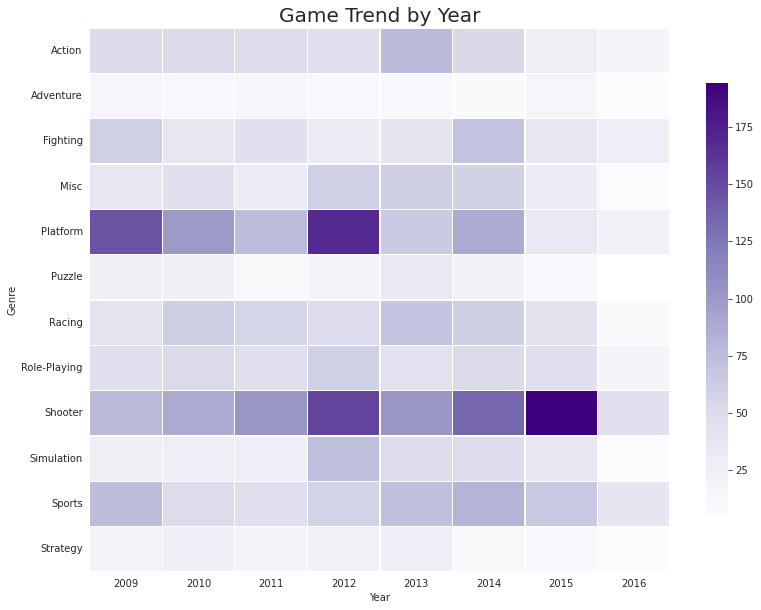

In [ ]:
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(Year_Trend_wide_df2.T, cmap="Purples",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.title('Game Trend by Year', fontsize=20)
plt.show()

In [ ]:
# 연간 Sales

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:539: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.fill_between(x, low, high, color=line_color, **err_kws)


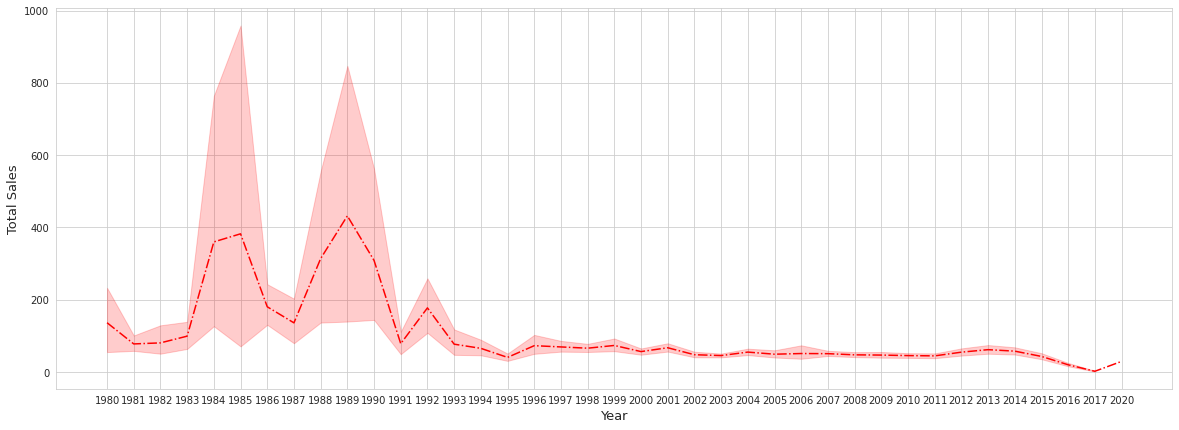

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
plt.xlabel("Year",fontsize=13)
plt.ylabel("Total Sales", fontsize=13)
sns.lineplot(data=Year_Trend_df,x='Year',y='SUM_Sales',color='R',linestyle='-.')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


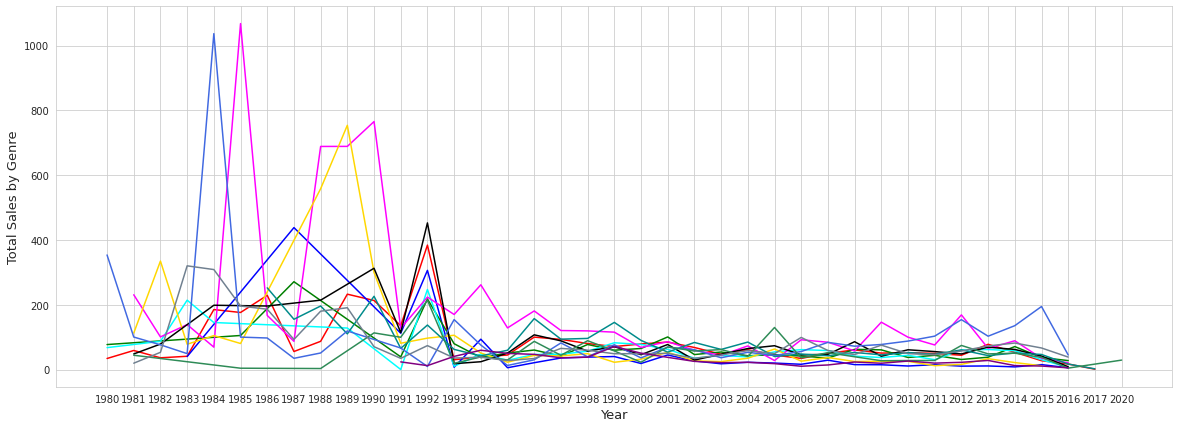

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
plt.xlabel("Year",fontsize=13)
plt.ylabel("Total Sales by Genre", fontsize=13)
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Action',color='R',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Adventure',color='B',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Fighting',color='G',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Misc',color='cyan',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Platform',color='magenta',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Puzzle',color='gold',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Racing',color='black',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Role-Playing',color='Darkcyan',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Shooter',color='Royalblue',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Simulation',color='seagreen',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Sports',color='slateGray',linestyle='-')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Strategy',color='Purple',linestyle='-')

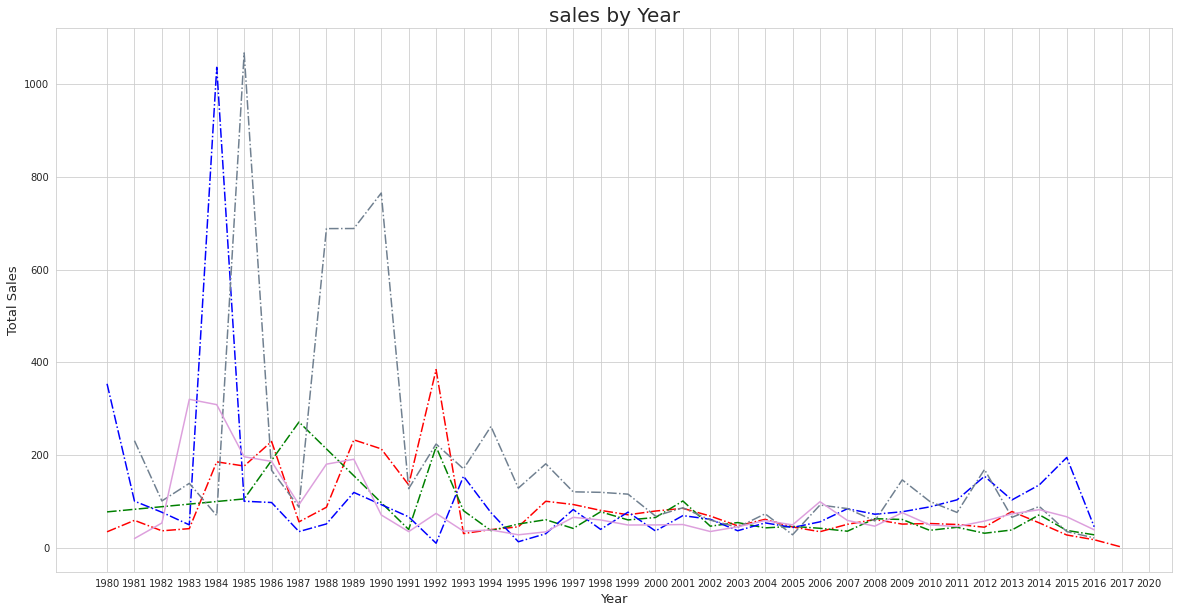

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title("sales by Year", fontsize=20)
plt.xlabel("Year",fontsize=13)
plt.ylabel("Total Sales", fontsize=13)
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Action',color='R',linestyle='-.')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Fighting',color='G',linestyle='-.')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Shooter',color='B',linestyle='-.')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Platform',color='slategray',linestyle='-.')
sns.lineplot(data=Year_Trend_wide_t,x='Year',y='Sports',color='plum',linestyle='-')

In [ ]:
# 1980년대, 1990년대에는 특정한 장르를 더욱 선호하는 경향이 있었지만, 2000년대 이후로는 비슷하게 분포하는 경향이 있음.
# 그 중 그나마 눈에 띄는 선들을 살펴보면, 파란색의 Shooter나 slategray색의 platform이다. 

In [ ]:
# 아래 그래프를 보면, shooter나 platform으로 밀고 가야함을 알 수 있다. 

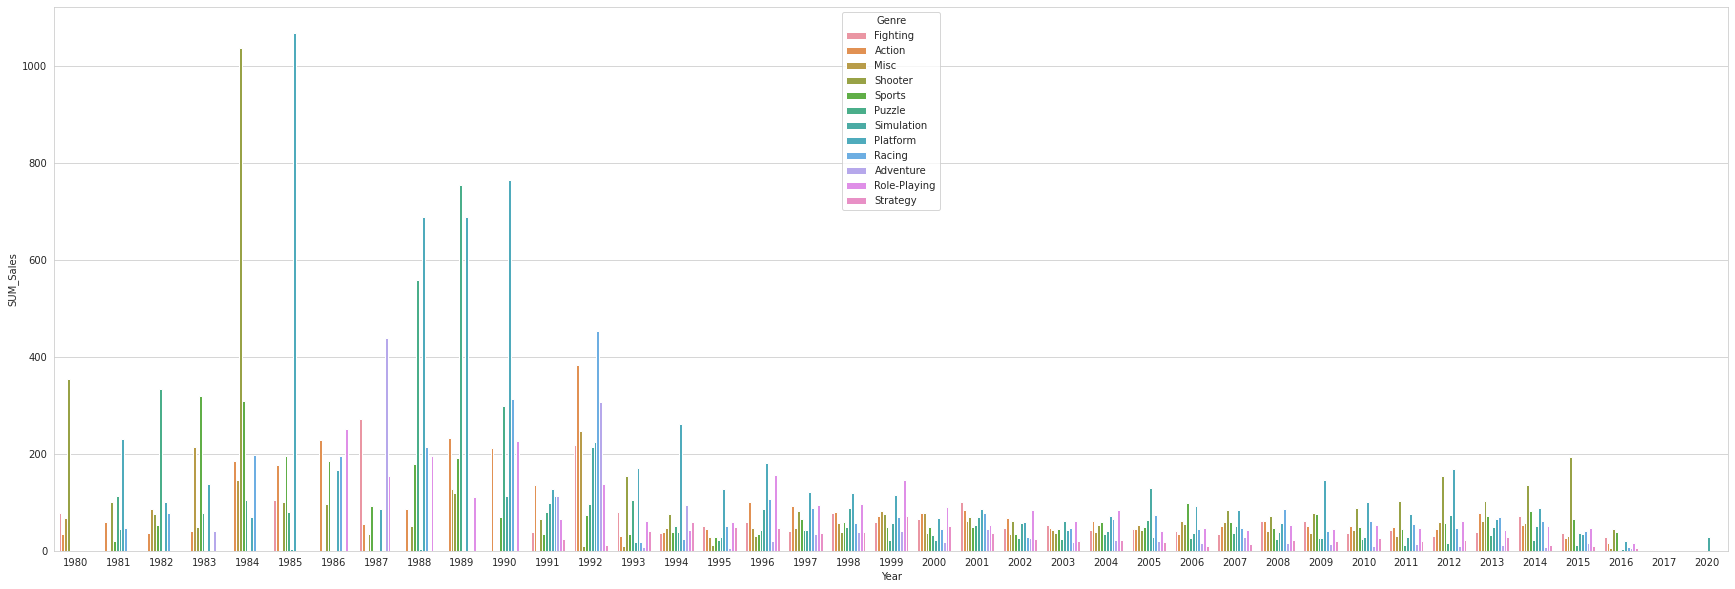

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data=Year_Trend_df,x='Year',y='SUM_Sales',hue='Genre',ci=None)

In [ ]:
Year_Trend_df=Year_Trend_df.sort_values(by='SUM_Sales',ascending=False)

In [ ]:
Year_Trend_df.T

,2908,4199,12579,3352,7829,1203,6937,3014,16531,10488,11137,10650,9416,3435,10899,4343,3483,14669,13111,13229,10555,9491,14856,5340,10917,10621,511,1005,2809,6248,9070,4240,6393,6236,14120,9786,14902,9924,3273,11123,...,9961,16499,8949,10646,8827,10357,9134,4270,3599,10616,12782,4851,14798,13615,8165,12332,7478,15107,9115,2225,14410,12865,3377,14406,7401,9995,10680,5598,6309,8992,6086,1844,8068,2400,9257,13002,1624,4687,2772,7049
Year,2006,1985,2008,2009,1996,1989,2006,2006,2009,1984,2005,2005,1999,2007,2009,2010,2013,2004,1990,2005,2006,1989,1988,2002,2002,None,2005,2001,2011,2010,2015,2012,2012,2009,2011,2001,2008,2010,2005,2011,...,2007,2006,2016,2012,2011,None,2008,1991,2008,2000,2002,2002,2006,2009,2012,2010,1997,2009,2006,2007,2006,1994,2015,2012,2006,1994,2008,2008,1995,1995,1989,2012,2011,1991,2002,2015,2006,2007,2008,2008
Genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter,Simulation,Racing,Role-Playing,Sports,Sports,Misc,Action,Action,Platform,Misc,Role-Playing,Platform,Platform,Action,Role-Playing,Role-Playing,Puzzle,Racing,Shooter,Shooter,Shooter,Shooter,Shooter,Shooter,Shooter,Action,Fighting,Shooter,Simulation,Racing,...,Misc,Action,Shooter,Action,Fighting,Puzzle,Simulation,Misc,Shooter,Platform,Sports,Misc,Role-Playing,Puzzle,Action,Sports,Strategy,Action,Role-Playing,Sports,Misc,Sports,Fighting,Action,Sports,Racing,Sports,Racing,Simulation,Misc,Puzzle,Action,Puzzle,Simulation,Sports,Role-Playing,Misc,Role-Playing,Misc,Role-Playing
SUM_Sales,8274,4024,3583,3300,3138,3026,3001,2901,2861,2831,2475,2343,2309,2272,2200,2182,2139,2081,2062,2022,1835,1814,1728,1615,1584,1532,1530,1497,1476,1464,1424,1404,1374,1352,1347,1310,1304,1273,1228,1221,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 플랫폼 별 장르 분포 파악하기

In [ ]:
#Platform, Genre, Sales 

In [ ]:
df3 = df[['Platform','Genre','SUM_Sales']]
df3

,Platform,Genre,SUM_Sales
0,DS,Action,4.0
1,Wii,Action,18.0
2,PSP,Adventure,2.0
3,DS,Misc,4.0
4,PS3,Platform,25.0
...,...,...,...
16593,GC,Platform,20.0
16594,PSP,Action,1.0
16595,PS3,Sports,79.0
16596,PSV,Action,38.0


In [ ]:
df3=df3.sort_values(by='SUM_Sales',ascending=False)
df3.T

,2908,4199,12579,3352,7829,1203,6937,3014,16531,10488,11137,10650,9416,3435,10899,4343,3483,14669,13111,13229,10555,9491,14856,5340,10917,10621,511,1005,2809,6248,9070,4240,6393,6236,14120,9786,14902,9924,3273,11123,...,9961,3599,4851,7639,8077,12782,7049,15107,10616,13002,12865,3445,3377,16499,13615,6086,9193,1844,8827,3410,7807,2772,9257,9995,8165,8949,2225,1624,2400,10219,10646,14406,5501,4687,9115,9134,14410,9261,8068,7401
Platform,Wii,NES,Wii,Wii,GB,GB,DS,Wii,Wii,NES,DS,DS,GB,Wii,Wii,X360,PS3,PS2,SNES,DS,DS,GB,NES,PS2,GBA,DS,DS,PS2,X360,X360,PS4,PS3,X360,X360,PS3,PS2,Wii,PS3,DS,3DS,...,DS,DS,PS2,PS2,DS,PS2,DS,DS,GB,PS4,SAT,PSP,PS3,Wii,DS,NES,PSP,PSP,X360,PS2,DS,PS2,GC,GEN,PSP,PS4,DS,DS,SNES,PSP,PSP,3DS,DS,PC,PS2,DS,PSP,PS2,PC,PSP
Genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter,Simulation,Racing,Role-Playing,Sports,Sports,Misc,Action,Action,Platform,Misc,Role-Playing,Platform,Platform,Action,Role-Playing,Role-Playing,Puzzle,Racing,Shooter,Shooter,Shooter,Shooter,Shooter,Shooter,Shooter,Action,Fighting,Shooter,Simulation,Racing,...,Misc,Shooter,Misc,Misc,Role-Playing,Sports,Role-Playing,Action,Platform,Role-Playing,Sports,Adventure,Fighting,Action,Puzzle,Puzzle,Adventure,Action,Fighting,Adventure,Role-Playing,Misc,Sports,Racing,Action,Shooter,Sports,Misc,Simulation,Role-Playing,Action,Action,Misc,Role-Playing,Role-Playing,Simulation,Misc,Action,Puzzle,Sports
SUM_Sales,8274,4024,3583,3300,3138,3026,3001,2901,2861,2831,2475,2343,2309,2272,2200,2182,2139,2081,2062,2022,1835,1814,1728,1615,1584,1532,1530,1497,1476,1464,1424,1404,1374,1352,1347,1310,1304,1273,1228,1221,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 플랫폼 별 장르 | 상관관계 표 1

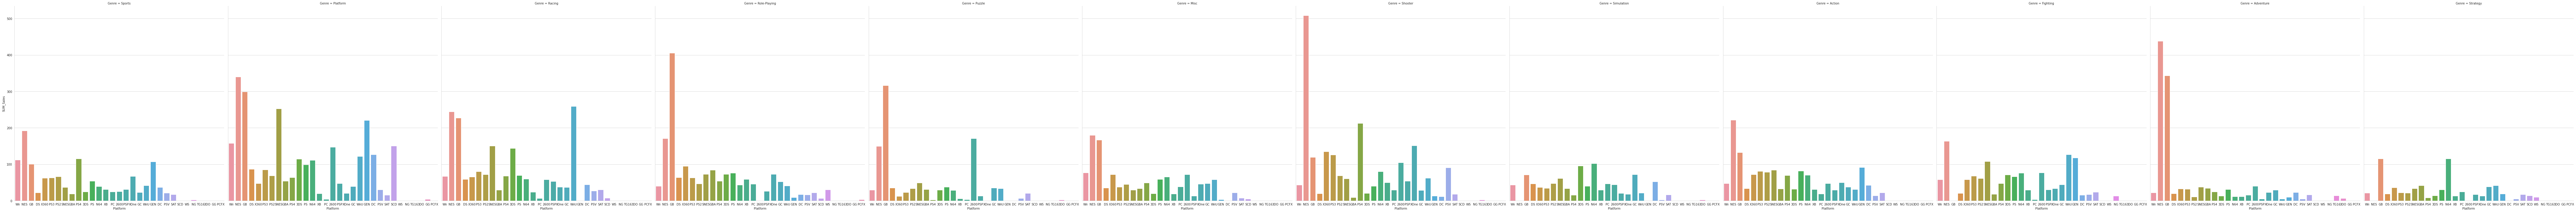

In [ ]:
sns.catplot(x='Platform',y='SUM_Sales',col='Genre',kind='bar',data=df3, height=10,ci=None)

In [ ]:
# 플랫폼 별 장르 상관관계 표2

In [ ]:
df4 = df3.melt(id_vars='Platform',value_vars='SUM_Sales')
df4

,Platform,variable,value
0,Wii,SUM_Sales,8274.0
1,NES,SUM_Sales,4024.0
2,Wii,SUM_Sales,3583.0
3,Wii,SUM_Sales,3300.0
4,GB,SUM_Sales,3138.0
...,...,...,...
16236,DS,SUM_Sales,0.0
16237,PSP,SUM_Sales,0.0
16238,PS2,SUM_Sales,0.0
16239,PC,SUM_Sales,0.0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  16241 non-null  object 
 1   variable  16241 non-null  object 
 2   value     16241 non-null  float64
dtypes: float64(1), object(2)
memory usage: 380.8+ KB


### 상관관계 분석하기

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

#### 플랫폼 별 장르 상관관계 (위에 이어서) : 상관관계 매트릭스

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0,20.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0,1.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0,79.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0,38.0


### + 가로 시각화 추가

In [ ]:
# 장르별 대비 NA sales 비중

In [ ]:
melt_na_genre

,Genre,variable,value
0,Action,NA_sales_percent,100.000000
1,Action,NA_sales_percent,94.444444
2,Adventure,NA_sales_percent,0.000000
3,Misc,NA_sales_percent,100.000000
4,Platform,NA_sales_percent,48.000000
...,...,...,...
16236,Platform,NA_sales_percent,75.000000
16237,Action,NA_sales_percent,100.000000
16238,Sports,NA_sales_percent,55.696203
16239,Action,NA_sales_percent,13.157895


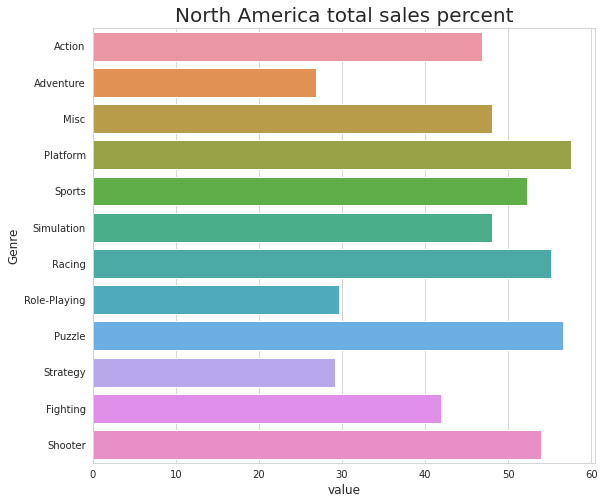

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(9,8))
area13 = fig.add_subplot(1,1,1)
area13.set_title('North America total sales percent',fontsize=20)
area13.set_ylabel('value',fontsize=12)
area13.set_xlabel('Genre',fontsize=12)
g13= sns.barplot(data=melt_na_genre,x='value',y='Genre', ax=area13,ci=None)
na_ts_vis= plt.show(g13)
na_ts_vis

In [ ]:
melt_eu_genre #장르별 Sales 전체 대비 NA sales 비중 melt

,Genre,variable,value
0,Action,EU_Sales_percent,0.000000
1,Action,EU_Sales_percent,0.000000
2,Adventure,EU_Sales_percent,0.000000
3,Misc,EU_Sales_percent,0.000000
4,Platform,EU_Sales_percent,36.000000
...,...,...,...
16236,Platform,EU_Sales_percent,20.000000
16237,Action,EU_Sales_percent,0.000000
16238,Sports,EU_Sales_percent,24.050633
16239,Action,EU_Sales_percent,13.157895


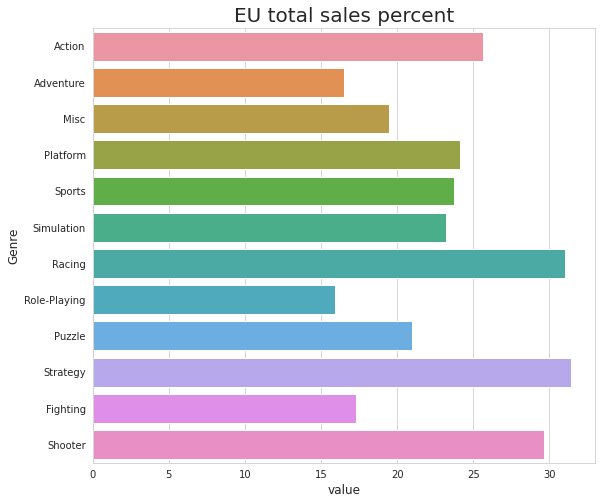

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(9,8))
area14 = fig.add_subplot(1,1,1)
area14.set_title('EU total sales percent',fontsize=20)
area14.set_ylabel('Genre',fontsize=12)
area14.set_xlabel('value',fontsize=12)
g14= sns.barplot(data=melt_eu_genre,x='value',y='Genre',ax=area14,ci=None)
eu_ts_vis= plt.show(g14)
eu_ts_vis

In [ ]:
melt_jp_genre.head() #장르별 Sales 전체 대비 jp sales 비중 melt

,Genre,variable,value
0,Action,JP_Sales_percent,0.0
1,Action,JP_Sales_percent,0.0
2,Adventure,JP_Sales_percent,100.0
3,Misc,JP_Sales_percent,0.0
4,Platform,JP_Sales_percent,0.0


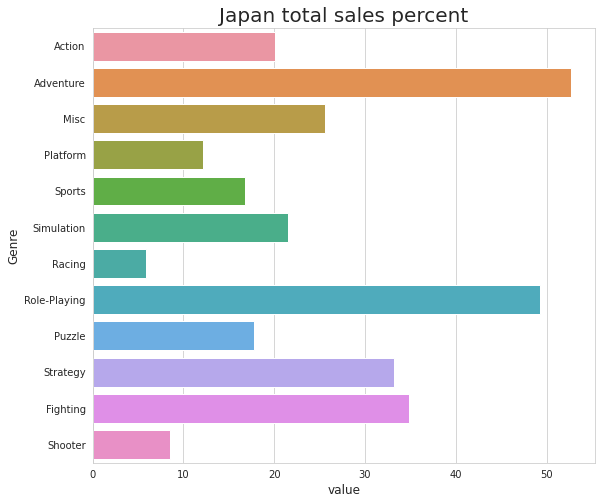

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(9,8))
area15 = fig.add_subplot(1,1,1)
area15.set_title('Japan total sales percent',fontsize=20)
area15.set_ylabel('Genre',fontsize=12)
area15.set_xlabel('value',fontsize=12)
g15= sns.barplot(data=melt_jp_genre,x='value',y='Genre',ax=area15,ci=None)
jp_ts_vis= plt.show(g15)
jp_ts_vis

In [ ]:
melt_other_genre.head() #장르별 Sales 전체 대비 jp sales 비중 melt

,Genre,variable,value
0,Action,Other_Sales_percent,0.000000
1,Action,Other_Sales_percent,5.555556
2,Adventure,Other_Sales_percent,0.000000
3,Misc,Other_Sales_percent,0.000000
4,Platform,Other_Sales_percent,16.000000


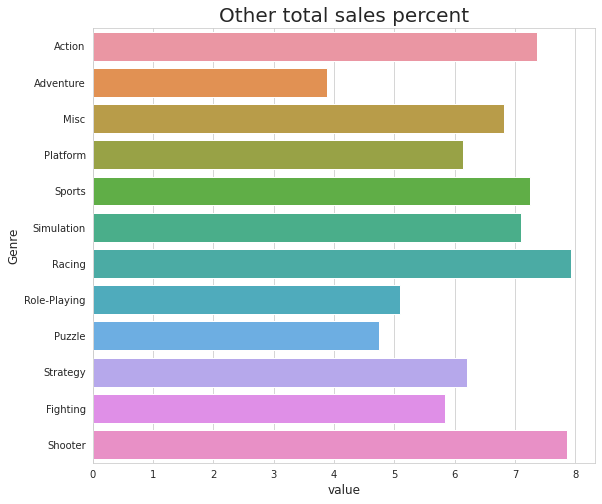

In [ ]:
sns.set_style('whitegrid')
fig= plt.figure(figsize=(9,8))
area16 = fig.add_subplot(1,1,1)
area16.set_title('Other total sales percent',fontsize=20)
area16.set_ylabel('Genre',fontsize=12)
area16.set_xlabel('value',fontsize=12)
g16= sns.barplot(data=melt_other_genre,x='value',y='Genre',ax=area16,ci=None)
other_ts_vis= plt.show(g16)
other_ts_vis

### 가설검정

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0


In [ ]:
# 가설1 Topic: 지역간의 Sales 상관관계가 있는가 (미국, 일본 중심)

''' 
1. SUM Sales와 유사한 미국의 Sales, 총 Sales와 NA Sales 연관이 있는지 (너무 당연하지만)
2. 총 Sales와 JP Sales의 연관성 (너무 당연)
2. Sales의 분포가 유독 다른 일본의 Sales, 미국의 Sales와 연관이 있는지 **

"미국과 일본의 Sales 상관관계가 있는가"
# H0: 미국과 일본의 Sales는 연관성이 없을 것이다.
# H1: 미국과 일본의 Sales는 연관성이 없지 않을 것이다.'''

' \n1. SUM Sales와 유사한 미국의 Sales, 총 Sales와 NA Sales 연관이 있는지 (너무 당연)\n2. 총 Sales와 JP Sales의 연관성 (너무 당연)\n2. Sales의 분포가 유독 다른 일본의 Sales, 미국의 Sales와 연관이 있는지 **\n\n"미국과 일본의 Sales 상관관계가 있는가"\n# H0: 미국과 일본의 Sales는 연관성이 없을 것이다.\n# H1: 미국과 일본의 Sales는 연관성이 없지 않을 것이다.'

In [ ]:
'''two sample chi square test를 진행해보려 함
two sample chi square test는 두 표본집단의 분포가 같은지 확인할 수 있다. 
두 표본집단의 연관성을 알 수 있으므로 two sample chi square test를 시도해보겠다.'''

'two sample chi square test를 진행해보려 함\ntwo sample chi square test는 두 표본집단의 분포가 같은지 확인할 수 있다. \n두 표본집단의 연관성을 알 수 있으므로 two sample chi square test를 시도해보겠다.'

In [ ]:
hyp_corr_df1 = df[['NA_Sales','EU_Sales','JP_Sales','SUM_Sales']]
hyp_corr_df1.head()

,NA_Sales,EU_Sales,JP_Sales,SUM_Sales
0,4.0,0.0,0.0,4.0
1,17.0,0.0,0.0,18.0
2,0.0,0.0,2.0,2.0
3,4.0,0.0,0.0,4.0
4,12.0,9.0,0.0,25.0


In [ ]:
hyp_corr_df1_na = hyp_corr_df1[['NA_Sales','SUM_Sales']]       # 1case : 미국과 총 세일
hyp_corr_df1_jp = hyp_corr_df1[['JP_Sales','SUM_Sales']]       # 2case : 일본과 총 세일
hyp_corr_df1_jp_na = hyp_corr_df1[['NA_Sales','JP_Sales']]     # 3case : 미국과 일본 세일의 연관성

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
hyp_corr_df1_na =pd.crosstab(hyp_corr_df1_na['NA_Sales'],hyp_corr_df1_na['SUM_Sales'])
hyp_corr_df1_na

SUM_Sales,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,14.0,15.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,22.0,23.0,23.0,24.0,24.0,25.0,25.0,26.0,27.0,28.0,28.0,29.0,29.0,29.0,...,1221.0,1228.0,1273.0,1304.0,1310.0,1347.0,1352.0,1374.0,1404.0,1424.0,1464.0,1476.0,1497.0,1530.0,1532.0,1584.0,1615.0,1728.0,1814.0,1835.0,2022.0,2062.0,2081.0,2139.0,2182.0,2200.0,2272.0,2309.0,2343.0,2475.0,2831.0,2861.0,2901.0,3001.0,3026.0,3138.0,3300.0,3583.0,4024.0,8274.0
NA_Sales,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,56,541,667,423,338,272,227,44,138,145,120,109,101,90,68,31,50,45,8,54,52,39,68,46,31,32,0,35,0,18,0,24,0,39,28,10,23,15,9,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,229,134,14,22,15,17,11,0,9,9,4,4,4,5,1,0,1,0,3,0,1,2,0,0,2,0,0,0,0,0,0,0,2,1,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,171,190,26,39,7,7,0,9,11,5,10,2,3,2,0,3,0,4,3,2,2,2,1,0,0,1,0,1,0,1,0,0,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,122,135,72,64,36,0,14,10,3,3,8,10,1,0,5,0,2,2,0,0,1,2,4,0,1,0,2,0,3,0,1,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,140,128,36,43,0,80,12,7,5,4,7,2,0,3,0,2,3,9,4,3,2,0,0,0,0,1,0,3,0,1,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2320.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2693.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
print("correlation=True : \n",chi2_contingency(hyp_corr_df1_na))
print("correlation=False : \n",chi2_contingency(hyp_corr_df1_na,correction=False))

correlation=True : 
 (3391034.9831380663, 0.0, 273360, array([[1.57162736e+01, 2.16098762e+02, 2.72789607e+02, ...,
        2.80647743e-01, 2.80647743e-01, 2.80647743e-01],
       [1.77920079e+00, 2.44640108e+01, 3.08818423e+01, ...,
        3.17714426e-02, 3.17714426e-02, 3.17714426e-02],
       [1.80678530e+00, 2.48432978e+01, 3.13606305e+01, ...,
        3.22640232e-02, 3.22640232e-02, 3.22640232e-02],
       ...,
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05]]))
correlation=False : 
 (3391034.9831380663, 0.0, 273360, array([[1.57162736e+01, 2.16098762e+02, 2.72789607e+02, ...,
        2.80647743e-01, 2.80647743e-01, 2.80647743e-01],
       [1.77920079e+00, 2.44640108e+01, 3.0881842

In [ ]:
'''첫번째 지수는 X^2 statistic, 두번째 지수가 p-value인데, 
p-value가 0.0으로 0.05보다 작다. p-value가 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.
즉, 미국의 Sales와 SUM Sales는 연관이 있다는 것이다. '''

'첫번째 지수는 X^2 statistic, 두번째 지수가 p-value인데, \np-value가 0.0으로 0.05보다 작다. p-value가 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.\n즉, 미국의 Sales와 SUM Sales는 연관이 있다는 것이다. '

In [ ]:
hyp_corr_df1_jp = pd.crosstab(hyp_corr_df1_jp['JP_Sales'],hyp_corr_df1_jp['SUM_Sales'])

In [ ]:
print("correlation=True : \n",chi2_contingency(hyp_corr_df1_jp))
print("correlation=False : \n",chi2_contingency(hyp_corr_df1_jp,correction=False))

correlation=True : 
 (1763347.223718991, 0.0, 161160, array([[3.53426513e+01, 4.85961456e+02, 6.13447448e+02, ...,
        6.31118773e-01, 6.31118773e-01, 6.31118773e-01],
       [2.36192353e+00, 3.24764485e+01, 4.09962441e+01, ...,
        4.21772058e-02, 4.21772058e-02, 4.21772058e-02],
       [2.43088480e+00, 3.34246660e+01, 4.21932147e+01, ...,
        4.34086571e-02, 4.34086571e-02, 4.34086571e-02],
       ...,
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05]]))
correlation=False : 
 (1763347.223718991, 0.0, 161160, array([[3.53426513e+01, 4.85961456e+02, 6.13447448e+02, ...,
        6.31118773e-01, 6.31118773e-01, 6.31118773e-01],
       [2.36192353e+00, 3.24764485e+01, 4.09962441e

In [ ]:
'''이번의 경우도 p-value가 0.0으로 0.05보다 작다. 
p-value가 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.
따라서 일본의 Sales와 SUM Sales는 연관이 있다 할 수 있다 ''' #사실 너무 당연한 가설

'이번의 경우도 p-value가 0.0으로 0.05보다 작다. \np-value가 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.\n따라서 일본의 Sales와 SUM Sales는 연관이 있다 할 수 있다 '

In [ ]:
#본격 가설 1
''' 일본과 미국 Sales의 상관관계 '''

' 일본과 미국 Sales의 상관관계 '

In [ ]:
hyp_corr_df1_jp_na = pd.crosstab(hyp_corr_df1_jp_na['JP_Sales'],hyp_corr_df1_jp_na['NA_Sales'])

In [ ]:
print("correlation=True : \n",chi2_contingency(hyp_corr_df1_jp_na))
print("correlation=False : \n",chi2_contingency(hyp_corr_df1_jp_na,correction=False))

correlation=True : 
 (895668.8541166802, 0.0, 95274, array([[2.87663937e+03, 3.25657287e+02, 3.30706237e+02, ...,
        6.31118773e-01, 6.31118773e-01, 6.31118773e-01],
       [1.92243704e+02, 2.17634382e+01, 2.21008559e+01, ...,
        4.21772058e-02, 4.21772058e-02, 4.21772058e-02],
       [1.97856659e+02, 2.23988671e+01, 2.27461363e+01, ...,
        4.34086571e-02, 4.34086571e-02, 4.34086571e-02],
       ...,
       [2.80647743e-01, 3.17714426e-02, 3.22640232e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [2.80647743e-01, 3.17714426e-02, 3.22640232e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [2.80647743e-01, 3.17714426e-02, 3.22640232e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05]]))
correlation=False : 
 (895668.8541166802, 0.0, 95274, array([[2.87663937e+03, 3.25657287e+02, 3.30706237e+02, ...,
        6.31118773e-01, 6.31118773e-01, 6.31118773e-01],
       [1.92243704e+02, 2.17634382e+01, 2.21008559e+0

In [ ]:
# 타 지역 Sales와 전체 Sales는 관계가 없다 하기 어렵다.

In [ ]:
hyp_corr_df6 = pd.crosstab(df['Other_Sales'],df['SUM_Sales'])
hyp_corr_df6

SUM_Sales,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,14.0,15.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,22.0,23.0,23.0,24.0,24.0,25.0,25.0,26.0,27.0,28.0,28.0,29.0,29.0,29.0,...,1221.0,1228.0,1273.0,1304.0,1310.0,1347.0,1352.0,1374.0,1404.0,1424.0,1464.0,1476.0,1497.0,1530.0,1532.0,1584.0,1615.0,1728.0,1814.0,1835.0,2022.0,2062.0,2081.0,2139.0,2182.0,2200.0,2272.0,2309.0,2343.0,2475.0,2831.0,2861.0,2901.0,3001.0,3026.0,3138.0,3300.0,3583.0,4024.0,8274.0
Other_Sales,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,56,761,963,705,553,511,376,105,167,220,161,161,140,114,107,46,50,81,3,77,51,54,77,52,38,46,0,46,0,21,0,38,0,50,28,4,23,15,11,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,9,5,44,107,124,150,140,0,246,222,249,234,163,177,144,0,89,47,133,75,93,99,73,55,34,1,24,1,25,0,30,0,24,26,23,0,0,23,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,4,0,0,0,2,6,0,12,22,14,29,27,69,50,0,46,0,69,38,85,45,46,50,57,0,50,2,77,1,68,0,60,67,41,0,0,53,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,1,0,0,1,0,3,3,4,8,0,7,0,11,10,17,15,15,46,20,0,37,0,27,3,17,0,40,9,15,0,0,23,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,3,0,2,0,4,2,4,8,1,7,10,0,10,0,7,0,8,1,5,9,5,0,0,38,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
414.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
753.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("correlation=True : \n",chi2_contingency(hyp_corr_df6))
print("correlation=False : \n",chi2_contingency(hyp_corr_df6,correction=False))

correlation=True : 
 (1516048.9922421677, 0.0, 105400, array([[2.21572563e+01, 3.04662274e+02, 3.84586663e+02, ...,
        3.95665292e-01, 3.95665292e-01, 3.95665292e-01],
       [1.14992919e+01, 1.58115264e+02, 1.99594853e+02, ...,
        2.05344498e-01, 2.05344498e-01, 2.05344498e-01],
       [5.31001786e+00, 7.30127455e+01, 9.21667385e+01, ...,
        9.48217474e-02, 9.48217474e-02, 9.48217474e-02],
       ...,
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05],
       [3.44806354e-03, 4.74108737e-02, 5.98485315e-02, ...,
        6.15725633e-05, 6.15725633e-05, 6.15725633e-05]]))
correlation=False : 
 (1516048.9922421677, 0.0, 105400, array([[2.21572563e+01, 3.04662274e+02, 3.84586663e+02, ...,
        3.95665292e-01, 3.95665292e-01, 3.95665292e-01],
       [1.14992919e+01, 1.58115264e+02, 1.9959485

In [ ]:
# NA Sales와 Genre 사이의 연관성

In [ ]:
hyp_corr_df2 = pd.crosstab(df['Genre'],df['NA_Sales'])
hyp_corr_df2

NA_Sales,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,...,605.0,606.0,616.0,642.0,663.0,672.0,675.0,676.0,682.0,685.0,691.0,699.0,701.0,728.0,797.0,825.0,841.0,852.0,894.0,900.0,903.0,907.0,909.0,943.0,954.0,967.0,981.0,1083.0,1127.0,1138.0,1278.0,1403.0,1459.0,1497.0,1575.0,1585.0,2320.0,2693.0,2908.0,4149.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,755,82,103,106,102,96,77,88,92,85,85,80,73,69,67,59,50,56,46,39,38,41,40,24,29,28,35,25,22,19,18,26,19,15,20,18,19,13,14,14,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adventure,738,33,30,38,27,33,32,38,31,20,16,21,14,9,14,9,9,12,7,8,5,4,6,6,8,3,2,7,2,3,5,2,1,4,2,3,2,3,3,3,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fighting,254,21,16,27,23,27,30,17,14,23,14,16,9,18,13,13,10,8,7,10,6,8,6,11,4,3,9,6,3,6,10,7,6,3,2,6,5,4,5,4,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Misc,535,45,32,41,48,45,43,45,51,44,53,35,36,43,30,24,27,22,21,28,18,12,16,11,14,23,10,14,14,9,8,7,5,13,3,5,7,8,2,9,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
Platform,91,28,36,26,31,36,27,24,23,24,31,14,23,19,11,9,15,10,13,13,10,11,11,7,6,10,9,6,3,5,5,7,8,11,6,4,3,4,2,6,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0
Puzzle,134,37,38,30,30,28,19,27,14,11,15,16,8,16,9,4,6,9,7,2,3,1,2,0,1,4,6,2,3,5,4,2,2,0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Racing,152,62,53,67,49,45,51,50,40,44,32,36,29,20,19,17,13,13,22,13,15,12,14,17,14,12,8,11,4,7,4,6,10,5,6,13,7,8,3,6,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Role-Playing,625,31,35,33,38,36,42,47,36,32,28,17,18,23,28,16,23,13,15,15,13,10,15,11,5,10,7,2,8,7,3,5,13,8,4,4,5,9,3,2,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Shooter,171,55,50,52,50,49,46,38,35,30,27,24,25,23,24,14,13,20,12,12,12,18,12,10,11,17,11,4,15,12,9,7,10,11,13,7,9,6,11,7,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print("correlation=True : \n",chi2_contingency(hyp_corr_df2))
print("correlation=False : \n",chi2_contingency(hyp_corr_df2,correction=False))

correlation=True : 
 (6146.650000523831, 1.120489909514143e-60, 4422, array([[9.09298689e+02, 1.02939474e+02, 1.04535435e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [3.55861339e+02, 4.02861893e+01, 4.09107814e+01, ...,
        7.80740102e-02, 7.80740102e-02, 7.80740102e-02],
       [2.34340866e+02, 2.65291546e+01, 2.69404593e+01, ...,
        5.14130903e-02, 5.14130903e-02, 5.14130903e-02],
       ...,
       [2.37427991e+02, 2.68786405e+01, 2.72953636e+01, ...,
        5.20903885e-02, 5.20903885e-02, 5.20903885e-02],
       [6.45209162e+02, 7.30425466e+01, 7.41749892e+01, ...,
        1.41555323e-01, 1.41555323e-01, 1.41555323e-01],
       [1.87753340e+02, 2.12550951e+01, 2.15846315e+01, ...,
        4.11920448e-02, 4.11920448e-02, 4.11920448e-02]]))
correlation=False : 
 (6146.650000523831, 1.120489909514143e-60, 4422, array([[9.09298689e+02, 1.02939474e+02, 1.04535435e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [3.55861339e

In [ ]:
'''귀무가설은 기각할 만한 근거가 충분치 않다. 
따라서 장르와 NA Sales 간의 연관성은 있다고 하기 어렵다. '''

'귀무가설은 기각할 만한 근거가 충분치 않다. \n따라서 장르와 NA Sales 간의 연관성은 있다고 하기 어렵다. '

In [ ]:
#EU Sales와 Genre의 연관성

In [ ]:
hyp_corr_df3 = pd.crosstab(df['Genre'],df['EU_Sales'])
print("correlation=True : \n",chi2_contingency(hyp_corr_df3,correction=False))

correlation=True : 
 (4359.684397380995, 3.7230757303822e-34, 3278, array([[1.14470291e+03, 2.87871436e+02, 2.45378979e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [4.47988671e+02, 1.12660797e+02, 9.60310326e+01, ...,
        7.80740102e-02, 7.80740102e-02, 7.80740102e-02],
       [2.95008312e+02, 7.41890893e+01, 6.32381011e+01, ...,
        5.14130903e-02, 5.14130903e-02, 5.14130903e-02],
       ...,
       [2.98894649e+02, 7.51664306e+01, 6.40711779e+01, ...,
        5.20903885e-02, 5.20903885e-02, 5.20903885e-02],
       [8.12244443e+02, 2.04264331e+02, 1.74113047e+02, ...,
        1.41555323e-01, 1.41555323e-01, 1.41555323e-01],
       [2.36359953e+02, 5.94401207e+01, 5.06662151e+01, ...,
        4.11920448e-02, 4.11920448e-02, 4.11920448e-02]]))


In [ ]:
hyp_corr_df4 = pd.crosstab(df['Genre'],df['JP_Sales'])
print("correlation=True : \n",chi2_contingency(hyp_corr_df4,correction=False))

correlation=True : 
 (5115.463350449974, 8.814439819199265e-166, 2607, array([[2.04482483e+03, 1.36654147e+02, 1.40644049e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [8.00258605e+02, 5.34806970e+01, 5.50421772e+01, ...,
        7.80740102e-02, 7.80740102e-02, 7.80740102e-02],
       [5.26984176e+02, 3.52179669e+01, 3.62462287e+01, ...,
        5.14130903e-02, 5.14130903e-02, 5.14130903e-02],
       ...,
       [5.33926482e+02, 3.56819161e+01, 3.67237239e+01, ...,
        5.20903885e-02, 5.20903885e-02, 5.20903885e-02],
       [1.45094206e+03, 9.69653962e+01, 9.97965027e+01, ...,
        1.41555323e-01, 1.41555323e-01, 1.41555323e-01],
       [4.22218459e+02, 2.82165507e+01, 2.90403916e+01, ...,
        4.11920448e-02, 4.11920448e-02, 4.11920448e-02]]))


In [ ]:
hyp_corr_df5 = pd.crosstab(df['Genre'],df['Other_Sales'])
print("correlation=True : \n",chi2_contingency(hyp_corr_df5,correction=False))

correlation=True : 
 (2270.3106710937445, 7.430082310624837e-19, 1705, array([[1.28195554e+03, 6.65316175e+02, 3.07222462e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [5.01703590e+02, 2.60376824e+02, 1.20233976e+02, ...,
        7.80740102e-02, 7.80740102e-02, 7.80740102e-02],
       [3.30380518e+02, 1.71462656e+02, 7.91761591e+01, ...,
        5.14130903e-02, 5.14130903e-02, 5.14130903e-02],
       ...,
       [3.34732837e+02, 1.73721446e+02, 8.02191983e+01, ...,
        5.20903885e-02, 5.20903885e-02, 5.20903885e-02],
       [9.09634505e+02, 4.72087002e+02, 2.17995197e+02, ...,
        1.41555323e-01, 1.41555323e-01, 1.41555323e-01],
       [2.64700080e+02, 1.37375469e+02, 6.34357490e+01, ...,
        4.11920448e-02, 4.11920448e-02, 4.11920448e-02]]))


In [ ]:
# 가설2 Topic: 
''' 미국의 장르별 비율은 다음과 같다.
    Action 20% , Sports 15%, Shooter13%, Platform10%, Misc9%, Racing 8%, Role-playing 7%, Fighting 5%, Simulation4%, Puzzle3%, Adventure2%, Strategy2%'''

' 미국의 장르별 비율은 다음과 같다.\n    Action 20% , Sports 15%, Shooter13%, Platform10%, Misc9%, Racing 8%, Role-playing 7%, Fighting 5%, Simulation4%, Puzzle3%, Adventure2%, Strategy2%'

### 출고량 높은 게임 분석

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0


In [ ]:
df6 = df.sort_values(by='SUM_Sales',ascending=False) #내림차순으로 정렬

In [ ]:
condition1 = (df.SUM_Sales >= 2000)  # 조건식 작성
upper_twothousand = df[condition1]
upper_twothousand

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
1203,Tetris,GB,1989,Puzzle,Nintendo,2320.0,226.0,422.0,58.0,3026.0
2908,Wii Sports,Wii,2006,Sports,Nintendo,4149.0,2902.0,377.0,846.0,8274.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1403.0,920.0,293.0,285.0,2901.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575.0,1101.0,328.0,296.0,3300.0
3435,Wii Fit,Wii,2007,Sports,Nintendo,894.0,803.0,360.0,215.0,2272.0
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,701.0,927.0,97.0,414.0,2139.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2908.0,358.0,681.0,77.0,4024.0
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1497.0,494.0,24.0,167.0,2182.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138.0,923.0,650.0,290.0,3001.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127.0,889.0,1022.0,100.0,3138.0


In [ ]:
condition2 = (df.SUM_Sales >= 3000)  # 조건식 작성
upper_three_thousand = df[condition2]
upper_three_thousand

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
1203,Tetris,GB,1989,Puzzle,Nintendo,2320.0,226.0,422.0,58.0,3026.0
2908,Wii Sports,Wii,2006,Sports,Nintendo,4149.0,2902.0,377.0,846.0,8274.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575.0,1101.0,328.0,296.0,3300.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2908.0,358.0,681.0,77.0,4024.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138.0,923.0,650.0,290.0,3001.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127.0,889.0,1022.0,100.0,3138.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1585.0,1288.0,379.0,331.0,3583.0


In [ ]:
condition3 = (df.SUM_Sales >= 1000)  # 조건식 작성
upper_thousand = df[condition3]

In [ ]:
upper_twothousand= upper_twothousand.sort_values(by='SUM_Sales',ascending=False)
upper_twothousand

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,4149.0,2902.0,377.0,846.0,8274.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2908.0,358.0,681.0,77.0,4024.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1585.0,1288.0,379.0,331.0,3583.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575.0,1101.0,328.0,296.0,3300.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127.0,889.0,1022.0,100.0,3138.0
1203,Tetris,GB,1989,Puzzle,Nintendo,2320.0,226.0,422.0,58.0,3026.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138.0,923.0,650.0,290.0,3001.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1403.0,920.0,293.0,285.0,2901.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1459.0,706.0,470.0,226.0,2861.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,2693.0,63.0,28.0,47.0,2831.0


In [ ]:
''' Top3 매출'''

' Top3 매출'

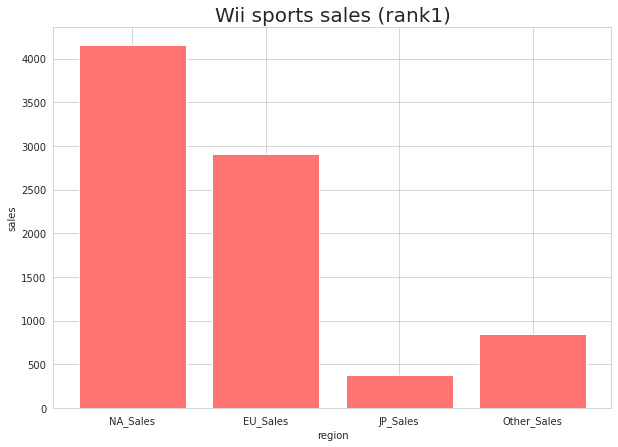

In [ ]:
x=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
rank1_y=[4149,2902,377,846]
plt.figure(figsize=(10,7))
plt.title("Wii sports sales (rank1)",fontsize=20)
plt.xlabel("region")
plt.ylabel("sales")
plt.bar(x,rank1_y,color='#ff7373')
plt.show()

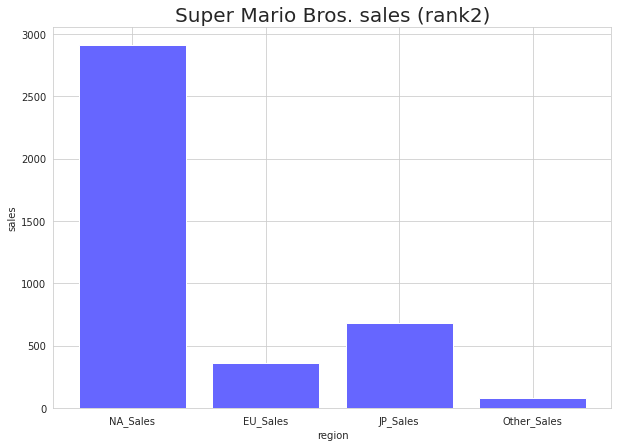

In [ ]:
x=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
rank2_y=[2908,358,681,77]
plt.figure(figsize=(10,7))
plt.title("Super Mario Bros. sales (rank2)",fontsize=20)
plt.xlabel("region")
plt.ylabel("sales")
plt.bar(x,rank2_y,color='#6666FF')
plt.show()

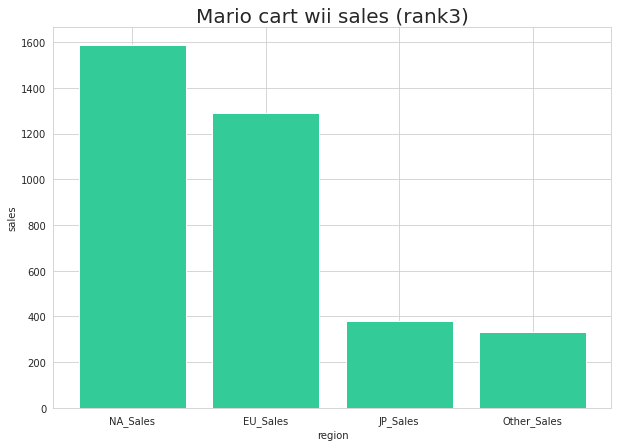

In [ ]:
x=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
rank2_y=[1585,1288,379,331]
plt.figure(figsize=(10,7))
plt.title("Mario cart wii sales (rank3)",fontsize=20)
plt.xlabel("region")
plt.ylabel("sales")
plt.bar(x,rank2_y,color='#33CC99')
plt.show()

In [ ]:
gb_genre_rank= upper_three_thousand.groupby('Genre').sum()
gb_genre_rank = gb_genre_rank.iloc[:,:]
gb_genre_rank = pd.DataFrame(gb_genre_rank) #새로운 데이터 프레임 생성
gb_genre_rank = gb_genre_rank.sort_values(by='SUM_Sales',ascending=False)

In [ ]:
gb_genre_rank = gb_genre_rank.astype(int)
gb_genre_rank

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Genre,,,,,
Sports,5724,4003,705,1142,11574
Platform,4046,1281,1331,367,7025
Racing,1585,1288,379,331,3583
Role-Playing,1127,889,1022,100,3138
Puzzle,2320,225,422,57,3026


In [ ]:
# 매출액 3000 이상

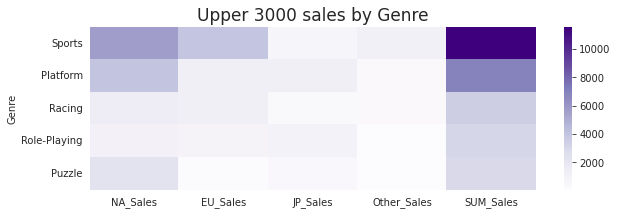

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Upper 3000 sales by Genre", fontsize=17)
sns.heatmap(gb_genre_rank,cmap='Purples')

In [ ]:
gb_genre_rank_delSum= gb_genre_rank.iloc[:,:-1]
gb_genre_rank_delSum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Sports,5724,4003,705,1142
Platform,4046,1281,1331,367
Racing,1585,1288,379,331
Role-Playing,1127,889,1022,100
Puzzle,2320,225,422,57


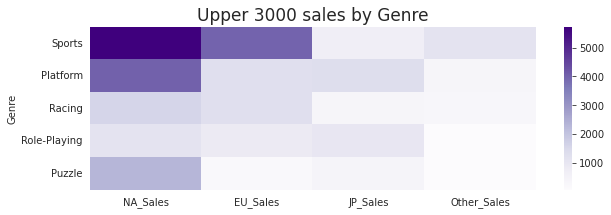

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Upper 3000 sales by Genre", fontsize=17)
sns.heatmap(gb_genre_rank_delSum,cmap='Purples')

In [ ]:
# 매출액 2000 이상

In [ ]:
upper_twothousand

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,4149.0,2902.0,377.0,846.0,8274.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2908.0,358.0,681.0,77.0,4024.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1585.0,1288.0,379.0,331.0,3583.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575.0,1101.0,328.0,296.0,3300.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127.0,889.0,1022.0,100.0,3138.0
1203,Tetris,GB,1989,Puzzle,Nintendo,2320.0,226.0,422.0,58.0,3026.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138.0,923.0,650.0,290.0,3001.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1403.0,920.0,293.0,285.0,2901.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1459.0,706.0,470.0,226.0,2861.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,2693.0,63.0,28.0,47.0,2831.0


In [ ]:
gb2_publisher_rank= upper_twothousand.groupby('Publisher').sum()
gb2_publisher_rank = gb2_publisher_rank.iloc[:,:]
gb2_publisher_rank = pd.DataFrame(gb2_publisher_rank) #새로운 데이터 프레임 생성
gb2_publisher_rank = gb2_publisher_rank.sort_values(by='SUM_Sales',ascending=False)
gb2_publisher_rank

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Publisher,,,,,
Nintendo,26701.0,14814.0,7359.0,3748.0,52622.0
Take-Two Interactive,1644.0,967.0,138.0,1471.0,4220.0
Microsoft Game Studios,1497.0,494.0,24.0,167.0,2182.0


In [ ]:
melted_gb2_publisher= gb2_publisher_rank.melt()
melted_gb2_publisher

,variable,value
0,NA_Sales,26701.0
1,NA_Sales,1644.0
2,NA_Sales,1497.0
3,EU_Sales,14814.0
4,EU_Sales,967.0
5,EU_Sales,494.0
6,JP_Sales,7359.0
7,JP_Sales,138.0
8,JP_Sales,24.0
9,Other_Sales,3748.0


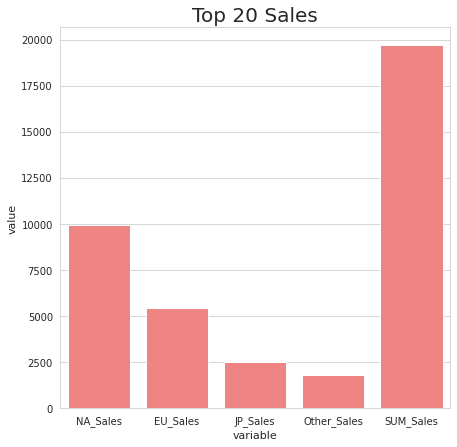

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel("region",fontsize=11)
plt.ylabel("sales",fontsize=11)
plt.title("Top 20 Sales",fontsize=20)
sns.barplot(data=melted_gb2_publisher,x='variable',y='value',ci=None,color='#ff7373')

In [ ]:
gb2_platform_rank= upper_twothousand.groupby('Platform').sum()
gb2_platform_rank = gb2_platform_rank.iloc[:,:]
gb2_platform_rank = pd.DataFrame(gb2_platform_rank) #새로운 데이터 프레임 생성
gb2_platform_rank = gb2_platform_rank.sort_values(by='SUM_Sales',ascending=False)

In [ ]:
gb2_platform_rank

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Platform,,,,,
Wii,11974.0,8579.0,2460.0,2378.0,25391.0
DS,3501.0,3706.0,1672.0,962.0,9841.0
GB,4347.0,1733.0,2164.0,229.0,8473.0
NES,5601.0,421.0,709.0,124.0,6855.0
X360,1497.0,494.0,24.0,167.0,2182.0
PS3,701.0,927.0,97.0,414.0,2139.0
PS2,943.0,40.0,41.0,1057.0,2081.0
SNES,1278.0,375.0,354.0,55.0,2062.0


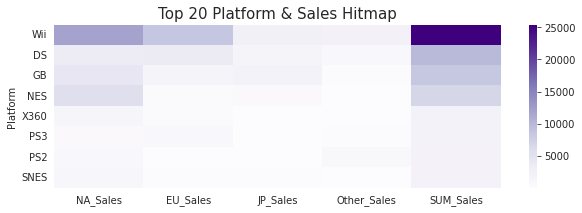

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Top 20 Platform & Sales Hitmap",fontsize=15)
sns.heatmap(gb2_platform_rank,cmap='Purples')

In [ ]:
gb2_genre_rank= upper_twothousand.groupby('Genre').sum()
gb2_genre_rank = gb2_genre_rank.iloc[:,:]
gb2_genre_rank = pd.DataFrame(gb2_genre_rank) #새로운 데이터 프레임 생성
gb2_genre_rank = gb2_genre_rank.sort_values(by='SUM_Sales',ascending=False)
gb2_genre_rank=gb2_genre_rank.T
gb2_genre_rank

Genre,Sports,Platform,Misc,Racing,Role-Playing,Action,Puzzle,Shooter,Simulation
NA_Sales,7527.0,6783.0,3375.0,2566.0,2027.0,1644.0,2320.0,2693.0,907.0
EU_Sales,5665.0,2362.0,2340.0,2045.0,1507.0,967.0,226.0,63.0,1100.0
JP_Sales,1318.0,2155.0,733.0,792.0,1742.0,138.0,422.0,28.0,193.0
Other_Sales,1536.0,648.0,657.0,523.0,171.0,1471.0,58.0,47.0,275.0
SUM_Sales,16046.0,11948.0,7105.0,5926.0,5447.0,4220.0,3026.0,2831.0,2475.0


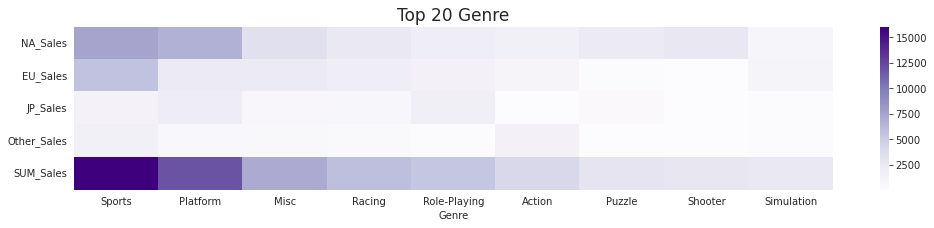

In [ ]:
plt.figure(figsize=(17,3))
plt.title("Top 20 Genre",fontsize=17)
sns.heatmap(gb2_genre_rank,cmap='Purples')

In [ ]:
gb2_genre_rank_delSum = gb2_genre_rank.iloc[:-1]
gb2_genre_rank_delSum

Genre,Sports,Platform,Misc,Racing,Role-Playing,Action,Puzzle,Shooter,Simulation
NA_Sales,7527.0,6783.0,3375.0,2566.0,2027.0,1644.0,2320.0,2693.0,907.0
EU_Sales,5665.0,2362.0,2340.0,2045.0,1507.0,967.0,226.0,63.0,1100.0
JP_Sales,1318.0,2155.0,733.0,792.0,1742.0,138.0,422.0,28.0,193.0
Other_Sales,1536.0,648.0,657.0,523.0,171.0,1471.0,58.0,47.0,275.0


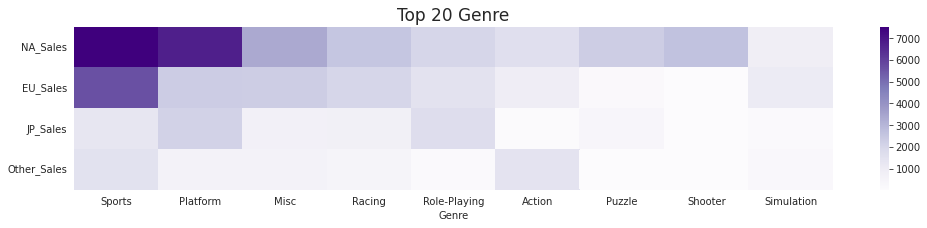

In [ ]:
plt.figure(figsize=(17,3))
plt.title("Top 20 Genre",fontsize=17)
sns.heatmap(gb2_genre_rank_delSum,cmap='Purples')